In [2913]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2914]:
#importamos galerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder,MinMaxScaler, OrdinalEncoder

In [2915]:
#Leemos archivo
imdb=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Entregable/bmw_pricing_v3.csv")

In [2916]:
imdb.head()

,marca,modelo,km,potencia,fecha_registro,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,asientos_traseros_plegables,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,fecha_venta
0,NaN,118,140411.0,100.0,2012-02-01,diesel,black,NaN,True,True,False,NaN,True,NaN,True,NaN,11300.0,2018-01-01
1,BMW,M4,13929.0,317.0,NaN,petrol,grey,convertible,True,True,False,NaN,False,True,True,True,69700.0,2018-02-01
2,BMW,320,183297.0,120.0,2012-04-01,diesel,white,NaN,False,False,False,NaN,True,False,True,False,10200.0,2018-02-01
3,BMW,420,128035.0,135.0,NaN,diesel,red,convertible,True,True,False,NaN,True,True,True,NaN,25100.0,2018-02-01
4,BMW,425,97097.0,160.0,NaN,diesel,silver,NaN,True,True,False,False,False,True,True,True,33400.0,2018-04-01


In [2917]:
imdb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4843 entries, 0 to 4842
Data columns (total 18 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   marca                        3873 non-null   object 
 1   modelo                       4840 non-null   object 
 2   km                           4841 non-null   float64
 3   potencia                     4842 non-null   float64
 4   fecha_registro               2420 non-null   object 
 5   tipo_gasolina                4838 non-null   object 
 6   color                        4398 non-null   object 
 7   tipo_coche                   3383 non-null   object 
 8   volante_regulable            4839 non-null   object 
 9   aire_acondicionado           4357 non-null   object 
 10  camara_trasera               4841 non-null   object 
 11  asientos_traseros_plegables  1452 non-null   object 
 12  elevalunas_electrico         4841 non-null   object 
 13  bluetooth         

In [2918]:
imdb.describe()

,km,potencia,precio
count,4.841000e+03,4842.000000,4837.000000
mean,1.409593e+05,128.981826,15831.920612
std,6.020853e+04,38.994839,9222.630708
min,-6.400000e+01,0.000000,100.000000
25%,1.028840e+05,100.000000,10800.000000
50%,1.410800e+05,120.000000,14200.000000
75%,1.752170e+05,135.000000,18600.000000
max,1.000376e+06,423.000000,178500.000000


In [2919]:
imdb.shape

(4843, 18)

# Eliminamos duplicados

In [2920]:
imdb[imdb.duplicated(keep=False)]

,marca,modelo,km,potencia,fecha_registro,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,asientos_traseros_plegables,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,fecha_venta


In [2921]:
imdb1 =imdb.copy()

In [2922]:
#no hay duplicados

# Revisamos nulos

In [2923]:
imdb1.isnull().any()

marca                           True
modelo                          True
km                              True
potencia                        True
fecha_registro                  True
tipo_gasolina                   True
color                           True
tipo_coche                      True
volante_regulable               True
aire_acondicionado              True
camara_trasera                  True
asientos_traseros_plegables     True
elevalunas_electrico            True
bluetooth                       True
gps                            False
alerta_lim_velocidad            True
precio                          True
fecha_venta                     True
dtype: bool

In [2924]:
imdb1.isnull().sum()

marca                           970
modelo                            3
km                                2
potencia                          1
fecha_registro                 2423
tipo_gasolina                     5
color                           445
tipo_coche                     1460
volante_regulable                 4
aire_acondicionado              486
camara_trasera                    2
asientos_traseros_plegables    3391
elevalunas_electrico              2
bluetooth                       728
gps                               0
alerta_lim_velocidad            728
precio                            6
fecha_venta                       1
dtype: int64

#Analizamos Columnas con nulos



*   hacemos value_counts revisar que datos tenemos

*   revisamos filas nulas para tomar decision
*   Tomamos decision: Eliminamos nulos, eliminamos columna o rellenamos con un dato de marcador.

##Marca

In [2925]:
imdb1["marca"].value_counts()

BMW    3873
Name: marca, dtype: int64

In [2926]:
imdb1[imdb1["marca"].isnull()]

,marca,modelo,km,potencia,fecha_registro,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,asientos_traseros_plegables,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,fecha_venta
0,NaN,118,140411.0,100.0,2012-02-01,diesel,black,NaN,True,True,False,NaN,True,NaN,True,NaN,11300.0,2018-01-01
8,NaN,Z4,123886.0,125.0,NaN,petrol,black,convertible,True,False,False,False,False,NaN,True,False,6200.0,2018-03-01
11,NaN,325,228000.0,145.0,NaN,diesel,black,NaN,True,True,False,False,True,False,True,NaN,13300.0,2018-03-01
18,NaN,325,205474.0,145.0,2009-05-01,diesel,NaN,NaN,True,True,False,NaN,True,NaN,True,NaN,11000.0,2018-04-01
21,NaN,218,24868.0,100.0,NaN,petrol,grey,convertible,False,True,False,NaN,False,NaN,True,True,31000.0,2018-05-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4804,NaN,220 Active Tourer,153358.0,140.0,2015-06-01,diesel,grey,van,False,NaN,False,NaN,False,False,True,True,11700.0,2018-02-01
4807,NaN,218 Active Tourer,197276.0,112.0,NaN,diesel,white,van,True,True,False,NaN,False,NaN,True,True,13100.0,2018-02-01
4825,NaN,225 Active Tourer,33300.0,170.0,NaN,petrol,NaN,van,True,True,False,NaN,False,False,False,True,19200.0,2018-05-01
4834,NaN,218 Gran Tourer,47782.0,110.0,NaN,diesel,blue,NaN,False,NaN,False,NaN,False,False,True,True,14900.0,2018-07-01


In [2927]:
#revisamos cuantos coche BMW tenemos y nos damos cuenta que no tenemos otro tipo de marca

In [2928]:
imdb1[imdb1["marca"] == "BMW"]

,marca,modelo,km,potencia,fecha_registro,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,asientos_traseros_plegables,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,fecha_venta
1,BMW,M4,13929.0,317.0,NaN,petrol,grey,convertible,True,True,False,NaN,False,True,True,True,69700.0,2018-02-01
2,BMW,320,183297.0,120.0,2012-04-01,diesel,white,NaN,False,False,False,NaN,True,False,True,False,10200.0,2018-02-01
3,BMW,420,128035.0,135.0,NaN,diesel,red,convertible,True,True,False,NaN,True,True,True,NaN,25100.0,2018-02-01
4,BMW,425,97097.0,160.0,NaN,diesel,silver,NaN,True,True,False,False,False,True,True,True,33400.0,2018-04-01
5,BMW,335,152352.0,225.0,2011-05-01,petrol,black,NaN,True,True,False,False,True,True,True,True,17100.0,2018-02-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4838,BMW,218 Gran Tourer,39743.0,110.0,NaN,diesel,black,NaN,False,True,False,NaN,False,False,True,False,14600.0,2018-08-01
4839,BMW,218 Active Tourer,49832.0,100.0,2015-06-01,diesel,grey,NaN,False,True,False,NaN,False,False,True,True,17500.0,2018-08-01
4840,BMW,218 Gran Tourer,19633.0,110.0,2015-10-01,diesel,grey,van,False,True,False,NaN,False,False,True,True,17000.0,2018-09-01
4841,BMW,218 Active Tourer,27920.0,110.0,2016-04-01,diesel,brown,van,True,True,False,False,False,False,True,True,22700.0,2018-09-01


In [2929]:
# Elimino columna marca

In [2930]:
del(imdb1["marca"])

In [2931]:
imdb1.reset_index(drop=True, inplace=True)
imdb1.shape

(4843, 17)

##Modelo

In [2932]:
imdb1["modelo"].value_counts()

320                752
520                633
318                568
X3                 438
116                358
                  ... 
M135                 1
225                  1
i8                   1
630                  1
214 Gran Tourer      1
Name: modelo, Length: 76, dtype: int64

In [2933]:
imdb1[imdb1["modelo"].isnull()]

,modelo,km,potencia,fecha_registro,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,asientos_traseros_plegables,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,fecha_venta
173,NaN,146338.0,105.0,NaN,diesel,black,NaN,False,True,False,NaN,False,NaN,True,NaN,13300.0,2018-08-01
4766,NaN,115566.0,105.0,2014-01-01,diesel,silver,suv,False,True,False,NaN,True,False,True,False,14900.0,2018-09-01
4802,NaN,118640.0,110.0,NaN,diesel,white,NaN,False,False,False,NaN,False,False,False,False,800.0,2018-03-01


In [2934]:
# Elimino filas con nulos

In [2935]:
imdb1.dropna(subset=["modelo"], inplace=True)

In [2936]:
imdb1[imdb1["modelo"].isnull()]

,modelo,km,potencia,fecha_registro,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,asientos_traseros_plegables,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,fecha_venta


##km

In [2937]:
imdb1[imdb1["km"].isnull()]

,modelo,km,potencia,fecha_registro,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,asientos_traseros_plegables,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,fecha_venta
459,520,NaN,135.0,2012-12-01,diesel,black,NaN,True,True,True,False,True,True,True,True,20300.0,2018-02-01
4811,X3,NaN,190.0,NaN,diesel,blue,van,True,True,True,True,True,False,True,True,19500.0,2018-07-01


In [2938]:
imdb1.dropna(subset=["km"], inplace=True)

In [2939]:
imdb1[imdb1["km"].isnull()]

,modelo,km,potencia,fecha_registro,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,asientos_traseros_plegables,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,fecha_venta


##potencia

In [2940]:
imdb1[imdb1["potencia"].isnull()]

,modelo,km,potencia,fecha_registro,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,asientos_traseros_plegables,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,fecha_venta
181,525,106054.0,NaN,2014-05-01,diesel,black,estate,False,True,False,NaN,False,False,True,True,18700.0,2018-03-01


In [2941]:
imdb1.dropna(subset=["potencia"], inplace=True)

In [2942]:
#elimino nulos

In [2943]:
imdb1[imdb1["potencia"].isnull()]

,modelo,km,potencia,fecha_registro,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,asientos_traseros_plegables,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,fecha_venta


##Fecha_registro

In [2944]:
imdb1["fecha_registro"].value_counts()

2013-07-01    93
2014-03-01    83
2014-05-01    80
2013-01-01    78
2013-10-01    77
              ..
2007-01-01     1
1990-03-01     1
2006-11-01     1
1994-01-01     1
2005-09-01     1
Name: fecha_registro, Length: 180, dtype: int64

In [2945]:
imdb1[imdb1["fecha_registro"].isnull()]

,modelo,km,potencia,fecha_registro,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,asientos_traseros_plegables,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,fecha_venta
1,M4,13929.0,317.0,NaN,petrol,grey,convertible,True,True,False,NaN,False,True,True,True,69700.0,2018-02-01
3,420,128035.0,135.0,NaN,diesel,red,convertible,True,True,False,NaN,True,True,True,NaN,25100.0,2018-02-01
4,425,97097.0,160.0,NaN,diesel,silver,NaN,True,True,False,False,False,True,True,True,33400.0,2018-04-01
6,325,205219.0,145.0,NaN,diesel,grey,convertible,True,True,False,NaN,True,True,True,True,12400.0,2018-02-01
8,Z4,123886.0,125.0,NaN,petrol,black,convertible,True,False,False,False,False,NaN,True,False,6200.0,2018-03-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4834,218 Gran Tourer,47782.0,110.0,NaN,diesel,blue,NaN,False,NaN,False,NaN,False,False,True,True,14900.0,2018-07-01
4835,218 Active Tourer,165707.0,110.0,NaN,diesel,black,van,False,True,False,NaN,False,NaN,True,True,13600.0,2018-07-01
4837,218 Gran Tourer,66770.0,110.0,NaN,diesel,blue,van,False,True,False,NaN,False,False,True,False,13400.0,2018-07-01
4838,218 Gran Tourer,39743.0,110.0,NaN,diesel,black,NaN,False,True,False,NaN,False,False,True,False,14600.0,2018-08-01


In [2946]:
# elimino Columna

In [2947]:
del(imdb1["fecha_registro"])

In [2948]:
imdb1.reset_index(drop=True, inplace=True)
imdb1.shape

(4837, 16)

##tipo_gasolina

In [2949]:
imdb1["tipo_gasolina"].value_counts()

diesel           4625
petrol            191
hybrid_petrol       8
Diesel              5
electro             3
Name: tipo_gasolina, dtype: int64

In [2950]:
imdb1[imdb1["tipo_gasolina"].isnull()]

,modelo,km,potencia,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,asientos_traseros_plegables,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,fecha_venta
82,420,54993.0,135.0,NaN,black,NaN,False,False,False,False,False,False,False,False,18400.0,2018-03-01
183,320,186697.0,135.0,NaN,white,estate,False,False,False,NaN,False,False,False,True,2400.0,2018-04-01
442,318,111622.0,100.0,NaN,black,estate,True,True,False,NaN,False,False,True,True,15400.0,2018-02-01
477,318,170350.0,105.0,NaN,white,NaN,False,True,False,NaN,False,False,True,False,10200.0,2018-02-01
627,318,147558.0,105.0,NaN,white,estate,False,NaN,False,NaN,False,False,False,True,100.0,2018-03-01


In [2951]:
imdb1.dropna(subset=["tipo_gasolina"], inplace=True)

In [2952]:
#elimino nulos

In [2953]:
imdb1[imdb1["tipo_gasolina"].isnull()]

,modelo,km,potencia,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,asientos_traseros_plegables,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,fecha_venta


In [2954]:
imdb1["tipo_gasolina"] = imdb1["tipo_gasolina"].replace('Diesel', 'diesel')

##color

In [2955]:
imdb1["color"].value_counts()

black     1494
grey      1070
blue       646
white      480
brown      302
silver     291
red         47
beige       37
green       14
orange       6
Name: color, dtype: int64

In [2956]:
imdb1[imdb1["color"].isnull()]

,modelo,km,potencia,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,asientos_traseros_plegables,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,fecha_venta
14,120,174631.0,120.0,diesel,NaN,convertible,True,True,False,False,False,False,True,False,10500.0,2018-04-01
18,325,205474.0,145.0,diesel,NaN,NaN,True,True,False,NaN,True,NaN,True,NaN,11000.0,2018-04-01
25,318,196092.0,85.0,petrol,NaN,convertible,True,False,False,False,False,False,False,False,1800.0,2018-05-01
36,318,187294.0,105.0,petrol,NaN,convertible,True,False,False,False,False,True,True,NaN,2400.0,2018-06-01
47,420,20996.0,135.0,petrol,NaN,coupe,True,False,False,NaN,True,False,True,False,21400.0,2018-04-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4754,X4,61989.0,140.0,diesel,NaN,NaN,False,False,False,NaN,False,NaN,False,True,28600.0,2018-09-01
4773,X5,285669.0,173.0,diesel,NaN,NaN,True,True,False,NaN,True,False,True,True,9300.0,2018-09-01
4800,218 Active Tourer,35382.0,110.0,diesel,NaN,van,False,NaN,False,NaN,False,NaN,True,True,13100.0,2018-02-01
4812,X3,110039.0,130.0,diesel,NaN,NaN,False,NaN,False,NaN,False,False,True,False,1300.0,2018-05-01


In [2957]:
imdb1["color"].fillna('sin_color', inplace=True)

In [2958]:
#Relleno nulos con sin_color

##tipo_coche

In [2959]:
imdb1["tipo_coche"].value_counts()

estate         1103
sedan           821
suv             754
hatchback       488
subcompact       77
coupe            76
convertible      30
van              28
Name: tipo_coche, dtype: int64

In [2960]:
imdb1[imdb1["tipo_coche"].isnull()]

,modelo,km,potencia,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,asientos_traseros_plegables,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,fecha_venta
0,118,140411.0,100.0,diesel,black,NaN,True,True,False,NaN,True,NaN,True,NaN,11300.0,2018-01-01
2,320,183297.0,120.0,diesel,white,NaN,False,False,False,NaN,True,False,True,False,10200.0,2018-02-01
4,425,97097.0,160.0,diesel,silver,NaN,True,True,False,False,False,True,True,True,33400.0,2018-04-01
5,335,152352.0,225.0,petrol,black,NaN,True,True,False,False,True,True,True,True,17100.0,2018-02-01
11,325,228000.0,145.0,diesel,black,NaN,True,True,False,False,True,False,True,NaN,13300.0,2018-03-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4824,216 Gran Tourer,48012.0,85.0,diesel,blue,NaN,True,True,False,False,False,True,True,NaN,15600.0,2018-06-01
4828,218 Gran Tourer,47782.0,110.0,diesel,blue,NaN,False,NaN,False,NaN,False,False,True,True,14900.0,2018-07-01
4832,218 Gran Tourer,39743.0,110.0,diesel,black,NaN,False,True,False,NaN,False,False,True,False,14600.0,2018-08-01
4833,218 Active Tourer,49832.0,100.0,diesel,grey,NaN,False,True,False,NaN,False,False,True,True,17500.0,2018-08-01


In [2961]:
imdb1["tipo_coche"].fillna('sin_tipo', inplace=True)

In [2962]:
#relleno datos nulos con Sin_tipo

In [2963]:
imdb1[imdb1["tipo_coche"].isnull()]

,modelo,km,potencia,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,asientos_traseros_plegables,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,fecha_venta


##volante_regulable

In [2964]:
imdb1["volante_regulable"].value_counts()

True     2659
False    2169
Name: volante_regulable, dtype: int64

In [2965]:
imdb1[imdb1["volante_regulable"].isnull()]

,modelo,km,potencia,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,asientos_traseros_plegables,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,fecha_venta
66,320,93066.0,135.0,diesel,black,coupe,NaN,False,False,NaN,True,False,True,NaN,11900.0,2018-06-01
271,318,195032.0,100.0,diesel,grey,sin_tipo,NaN,NaN,False,False,False,False,True,False,4900.0,2018-01-01
486,320,227691.0,135.0,diesel,black,sin_tipo,NaN,True,False,False,False,True,True,False,10500.0,2018-02-01
611,318,201626.0,105.0,diesel,black,sin_tipo,NaN,NaN,False,NaN,True,False,True,True,11700.0,2018-03-01


In [2966]:
imdb1.dropna(subset=["volante_regulable"], inplace=True)

In [2967]:
#elimino nulos

In [2968]:
imdb1[imdb1["volante_regulable"].isnull()]

,modelo,km,potencia,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,asientos_traseros_plegables,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,fecha_venta


##aire_acondicionado

In [2969]:
imdb1[imdb1["aire_acondicionado"].isnull()]

,modelo,km,potencia,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,asientos_traseros_plegables,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,fecha_venta
12,420,132025.0,135.0,diesel,blue,sin_tipo,True,NaN,False,False,True,True,True,NaN,21700.0,2018-03-01
16,220,21167.0,135.0,petrol,white,convertible,False,NaN,True,NaN,False,False,False,True,21900.0,2018-04-01
28,Z4,123809.0,125.0,petrol,black,convertible,True,NaN,False,NaN,False,True,True,False,6500.0,2018-05-01
40,420,36696.0,120.0,diesel,black,convertible,True,NaN,False,NaN,True,False,True,True,34300.0,2018-07-01
49,118,147180.0,100.0,diesel,sin_color,coupe,True,NaN,True,NaN,False,False,True,NaN,8400.0,2018-07-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4805,216 Active Tourer,193657.0,85.0,diesel,silver,van,False,NaN,False,NaN,False,False,True,False,8900.0,2018-09-01
4812,X3,110039.0,130.0,diesel,sin_color,sin_tipo,False,NaN,False,NaN,False,False,True,False,1300.0,2018-05-01
4814,Active Tourer,48380.0,100.0,diesel,black,van,True,NaN,False,NaN,False,NaN,True,False,19000.0,2018-05-01
4828,218 Gran Tourer,47782.0,110.0,diesel,blue,sin_tipo,False,NaN,False,NaN,False,False,True,True,14900.0,2018-07-01


In [2970]:
imdb1["aire_acondicionado"].value_counts()

True     3457
False     888
Name: aire_acondicionado, dtype: int64

In [2971]:
imdb1["aire_acondicionado"].fillna('sin_aire', inplace=True)

In [2972]:
#Relleno nulos con sin_aire

In [2973]:
imdb1[imdb1["aire_acondicionado"].isnull()]

,modelo,km,potencia,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,asientos_traseros_plegables,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,fecha_venta


##camara_trasera

In [2974]:
imdb1["camara_trasera"].value_counts()

False    3851
True      975
Name: camara_trasera, dtype: int64

In [2975]:
imdb1[imdb1["camara_trasera"].isnull()]

,modelo,km,potencia,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,asientos_traseros_plegables,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,fecha_venta
289,520,163675.0,135.0,diesel,sin_color,estate,True,True,NaN,NaN,True,NaN,True,True,14900.0,2018-01-01
407,316,160619.0,85.0,diesel,black,estate,False,True,NaN,NaN,True,NaN,True,NaN,11700.0,2018-04-01


In [2976]:
imdb1.dropna(subset=["camara_trasera"], inplace=True)

In [2977]:
#Elimino nulos

In [2978]:
imdb1[imdb1["camara_trasera"].isnull()]

,modelo,km,potencia,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,asientos_traseros_plegables,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,fecha_venta


##asientos_traseros_plegable

In [2979]:
imdb1[imdb1["asientos_traseros_plegables"].isnull()]

,modelo,km,potencia,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,asientos_traseros_plegables,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,fecha_venta
0,118,140411.0,100.0,diesel,black,sin_tipo,True,True,False,NaN,True,NaN,True,NaN,11300.0,2018-01-01
1,M4,13929.0,317.0,petrol,grey,convertible,True,True,False,NaN,False,True,True,True,69700.0,2018-02-01
2,320,183297.0,120.0,diesel,white,sin_tipo,False,False,False,NaN,True,False,True,False,10200.0,2018-02-01
3,420,128035.0,135.0,diesel,red,convertible,True,True,False,NaN,True,True,True,NaN,25100.0,2018-02-01
6,325,205219.0,145.0,diesel,grey,convertible,True,True,False,NaN,True,True,True,True,12400.0,2018-02-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4831,218 Gran Tourer,66770.0,110.0,diesel,blue,van,False,True,False,NaN,False,False,True,False,13400.0,2018-07-01
4832,218 Gran Tourer,39743.0,110.0,diesel,black,sin_tipo,False,True,False,NaN,False,False,True,False,14600.0,2018-08-01
4833,218 Active Tourer,49832.0,100.0,diesel,grey,sin_tipo,False,True,False,NaN,False,False,True,True,17500.0,2018-08-01
4834,218 Gran Tourer,19633.0,110.0,diesel,grey,van,False,True,False,NaN,False,False,True,True,17000.0,2018-09-01


In [2980]:
imdb1["asientos_traseros_plegables"].value_counts()

False    1146
True      301
Name: asientos_traseros_plegables, dtype: int64

In [2981]:
# Elimino Columna

In [2982]:
del(imdb1["asientos_traseros_plegables"])

In [2983]:
imdb1.reset_index(drop=True, inplace=True)

##elevalunas_electrico

In [2984]:
imdb1["elevalunas_electrico"].value_counts()

False    2602
True     2222
Name: elevalunas_electrico, dtype: int64

In [2985]:
imdb1[imdb1["elevalunas_electrico"].isnull()]

,modelo,km,potencia,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,fecha_venta
63,640,69695.0,230.0,diesel,sin_color,coupe,True,True,False,NaN,True,True,True,36300.0,2018-02-01
298,535,148738.0,230.0,diesel,grey,estate,True,True,True,NaN,False,True,True,28800.0,2018-01-01


In [2986]:
imdb1.dropna(subset=["elevalunas_electrico"], inplace=True)

In [2987]:
#elimino nulos

In [2988]:
imdb1[imdb1["elevalunas_electrico"].isnull()]

,modelo,km,potencia,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,fecha_venta


##bluetooth

In [2989]:
imdb1["bluetooth"].value_counts()

False    3106
True      993
Name: bluetooth, dtype: int64

In [2990]:
imdb1[imdb1["bluetooth"].isnull()]

,modelo,km,potencia,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,fecha_venta
0,118,140411.0,100.0,diesel,black,sin_tipo,True,True,False,True,NaN,True,NaN,11300.0,2018-01-01
8,Z4,123886.0,125.0,petrol,black,convertible,True,False,False,False,NaN,True,False,6200.0,2018-03-01
18,325,205474.0,145.0,diesel,sin_color,sin_tipo,True,True,False,True,NaN,True,NaN,11000.0,2018-04-01
21,218,24868.0,100.0,petrol,grey,convertible,False,True,False,False,NaN,True,True,31000.0,2018-05-01
22,420,90401.0,135.0,diesel,grey,convertible,True,True,False,True,NaN,True,True,26300.0,2018-05-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4789,218 Active Tourer,35382.0,110.0,diesel,sin_color,van,False,sin_aire,False,False,NaN,True,True,13100.0,2018-02-01
4791,218 Active Tourer,197276.0,112.0,diesel,white,van,True,True,False,False,NaN,True,True,13100.0,2018-02-01
4793,218 Gran Tourer,30919.0,85.0,diesel,white,sin_tipo,False,True,True,False,NaN,True,False,19600.0,2018-04-01
4803,Active Tourer,48380.0,100.0,diesel,black,van,True,sin_aire,False,False,NaN,True,False,19000.0,2018-05-01


In [2991]:
imdb1["bluetooth"].fillna('sin_bluetooth', inplace=True)

In [2992]:
#Relleno nulos con sin_bluetooth

In [2993]:
imdb1[imdb1["bluetooth"].isnull()]

,modelo,km,potencia,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,fecha_venta


##alerta_lim_velocidad

In [2994]:
imdb1["alerta_lim_velocidad"].value_counts()

True     2230
False    1869
Name: alerta_lim_velocidad, dtype: int64

In [2995]:
imdb1[imdb1["alerta_lim_velocidad"].isnull()]

,modelo,km,potencia,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,fecha_venta
0,118,140411.0,100.0,diesel,black,sin_tipo,True,True,False,True,sin_bluetooth,True,NaN,11300.0,2018-01-01
3,420,128035.0,135.0,diesel,red,convertible,True,True,False,True,True,True,NaN,25100.0,2018-02-01
11,325,228000.0,145.0,diesel,black,sin_tipo,True,True,False,True,False,True,NaN,13300.0,2018-03-01
12,420,132025.0,135.0,diesel,blue,sin_tipo,True,sin_aire,False,True,True,True,NaN,21700.0,2018-03-01
15,120,208945.0,130.0,diesel,grey,convertible,True,True,False,True,False,True,NaN,8300.0,2018-04-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4778,X5 M,125197.0,230.0,diesel,blue,sin_tipo,True,sin_aire,True,True,True,True,NaN,42700.0,2018-09-01
4780,X5,87745.0,230.0,diesel,brown,suv,True,True,True,False,True,True,NaN,44700.0,2018-09-01
4781,X5,111962.0,190.0,diesel,black,suv,True,True,False,True,sin_bluetooth,True,NaN,26500.0,2018-09-01
4813,216 Gran Tourer,48012.0,85.0,diesel,blue,sin_tipo,True,True,False,False,True,True,NaN,15600.0,2018-06-01


In [2996]:
imdb1["alerta_lim_velocidad"].fillna('sin_alerta', inplace=True)

In [2997]:
imdb1[imdb1["alerta_lim_velocidad"].isnull()]

,modelo,km,potencia,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,fecha_venta


##precio

In [2998]:
imdb1["precio"].value_counts()

13100.0    68
14900.0    63
11900.0    60
14300.0    60
16100.0    57
           ..
39200.0     1
4700.0      1
52400.0     1
65400.0     1
45100.0     1
Name: precio, Length: 437, dtype: int64

In [2999]:
imdb1[imdb1["precio"].isnull()]

,modelo,km,potencia,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,fecha_venta
115,420,174740.0,135.0,diesel,sin_color,coupe,True,True,True,True,True,True,True,NaN,2018-05-01
512,520,163803.0,135.0,diesel,grey,estate,False,True,True,False,False,True,False,NaN,2018-02-01
527,316,34489.0,85.0,diesel,black,estate,True,False,False,False,False,True,False,NaN,2018-02-01
537,318,157129.0,100.0,diesel,blue,estate,True,sin_aire,True,True,False,True,True,NaN,2018-03-01
557,320,166866.0,120.0,diesel,blue,sin_tipo,True,True,False,True,True,True,True,NaN,2018-03-01
572,320,114771.0,135.0,diesel,blue,sin_tipo,False,True,False,False,False,True,False,NaN,2018-03-01


In [3000]:
#media del precio para los nulos

In [3001]:
imdb1["precio"].fillna(imdb1["precio"].median(),inplace=True)

In [3002]:
imdb1[imdb1["precio"].isnull()]

,modelo,km,potencia,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,fecha_venta


##fecha_venta

In [3003]:
imdb1[imdb1["fecha_venta"].isnull()]

,modelo,km,potencia,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,fecha_venta
582,525,269290.0,120.0,diesel,silver,sin_tipo,True,False,True,False,False,True,True,4200.0,NaN


In [3004]:
imdb1["fecha_venta"].value_counts()

2018-05-01    809
2018-03-01    733
2018-04-01    689
2018-06-01    602
2018-07-01    536
2018-08-01    526
2018-02-01    497
2018-09-01    222
2018-01-01    205
2007-08-01      1
2010-04-01      1
2009-04-01      1
2008-06-01      1
Name: fecha_venta, dtype: int64

In [3005]:
imdb1.dropna(subset=["fecha_venta"], inplace=True)

In [3006]:
#Elimino Nulos

In [3007]:
imdb1[imdb1["fecha_venta"].isnull()]

,modelo,km,potencia,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,fecha_venta


#Copia

In [3008]:
imdb2 = imdb1.copy()

#Analisis Univariable

In [3009]:
imdb2.isnull().sum()

modelo                  0
km                      0
potencia                0
tipo_gasolina           0
color                   0
tipo_coche              0
volante_regulable       0
aire_acondicionado      0
camara_trasera          0
elevalunas_electrico    0
bluetooth               0
gps                     0
alerta_lim_velocidad    0
precio                  0
fecha_venta             0
dtype: int64

In [3010]:
imdb2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4823 entries, 0 to 4825
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   modelo                4823 non-null   object 
 1   km                    4823 non-null   float64
 2   potencia              4823 non-null   float64
 3   tipo_gasolina         4823 non-null   object 
 4   color                 4823 non-null   object 
 5   tipo_coche            4823 non-null   object 
 6   volante_regulable     4823 non-null   object 
 7   aire_acondicionado    4823 non-null   object 
 8   camara_trasera        4823 non-null   object 
 9   elevalunas_electrico  4823 non-null   object 
 10  bluetooth             4823 non-null   object 
 11  gps                   4823 non-null   bool   
 12  alerta_lim_velocidad  4823 non-null   object 
 13  precio                4823 non-null   float64
 14  fecha_venta           4823 non-null   object 
dtypes: bool(1), float64(3

In [3011]:
imdb2.describe()

,km,potencia,precio
count,4.823000e+03,4823.000000,4823.000000
mean,1.409283e+05,128.971594,15839.788513
std,6.023036e+04,38.988484,9217.506455
min,-6.400000e+01,0.000000,100.000000
25%,1.028070e+05,100.000000,10900.000000
50%,1.410630e+05,120.000000,14200.000000
75%,1.751955e+05,135.000000,18600.000000
max,1.000376e+06,423.000000,178500.000000


In [3012]:
for i in imdb2.columns:
    print('\n',i,imdb2[i].unique(),'\n')


 modelo ['118' 'M4' '320' '420' '425' '335' '325' 'Z4' '120' '220' '650' '135'
 '218' '318' '430' 'M3' '330' '225' 'M235' '316' '435' '640'
 '640 Gran Coupé' '435 Gran Coupé' 'i8' '630' '430 Gran Coupé' '635' '520'
 '525' '530' '535' '320 Gran Turismo' '518' '116' '328' '523' 'X3' 'M550'
 '528' '325 Gran Turismo' '125' '318 Gran Turismo' '420 Gran Coupé' 'i3'
 '114' '520 Gran Turismo' '530 Gran Turismo' 'M135' '418 Gran Coupé'
 '330 Gran Turismo' '335 Gran Turismo' '730' '123' '535 Gran Turismo'
 '740' '750' 'ActiveHybrid 5' '735' 'M5' 'X5' 'X1' 'X4' 'X6' 'X6 M' 'X5 M'
 'X5 M50' '218 Active Tourer' '218 Gran Tourer' '216' '220 Active Tourer'
 '216 Gran Tourer' '216 Active Tourer' ' Active Tourer'
 '225 Active Tourer' '214 Gran Tourer'] 


 km [140411.  13929. 183297. ...  19633.  27920. 195840.] 


 potencia [100. 317. 120. 135. 160. 225. 145. 105. 125. 130. 270. 110. 140. 180.
  85. 190. 236. 240. 250. 230. 309. 170. 142. 155. 210. 122. 200.  90.
 150. 141. 173. 137. 280. 112. 189.  

In [3013]:
# Observo que fecha_venta siempre son en dia 1 por lo cual no tiene relevancia y hay una potencia de 0

In [3014]:
for i in imdb2.columns:
    print('\n',i,imdb2[i].value_counts(),'\n')


 modelo 320                749
520                631
318                563
X3                 437
116                358
                  ... 
M135                 1
225                  1
i8                   1
630                  1
214 Gran Tourer      1
Name: modelo, Length: 76, dtype: int64 


 km 82406.0     2
175172.0    2
120833.0    2
101223.0    2
94829.0     2
           ..
221487.0    1
173289.0    1
190520.0    1
177650.0    1
195840.0    1
Name: km, Length: 4766, dtype: int64 


 potencia 135.0    876
120.0    784
85.0     630
100.0    568
105.0    446
        ... 
224.0      1
121.0      1
239.0      1
236.0      1
261.0      1
Name: potencia, Length: 61, dtype: int64 


 tipo_gasolina diesel           4621
petrol            191
hybrid_petrol       8
electro             3
Name: tipo_gasolina, dtype: int64 


 color black        1490
grey         1068
blue          646
white         480
sin_color     443
brown         302
silver        290
red            47
beige     

array([[<Axes: title={'center': 'km'}>]], dtype=object)

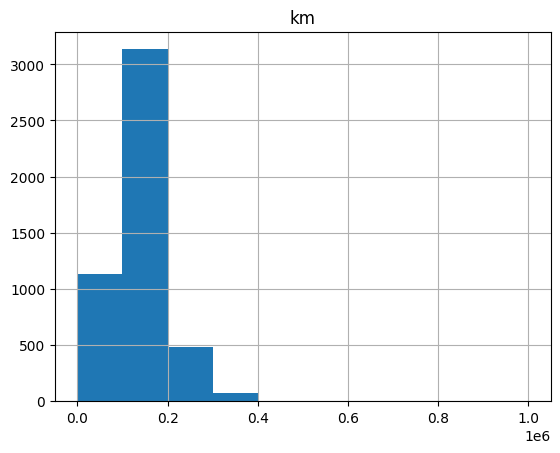

In [3015]:
imdb2.hist("km")

array([[<Axes: title={'center': 'precio'}>]], dtype=object)

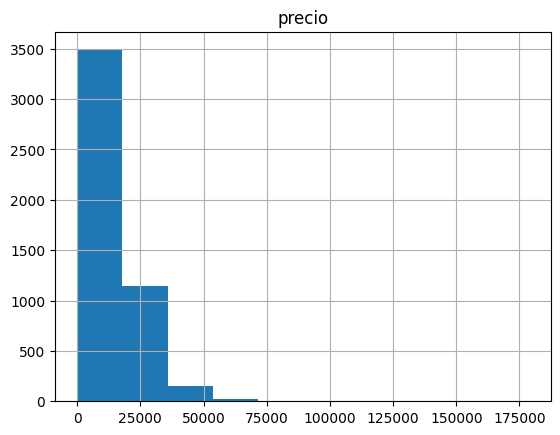

In [3016]:
imdb2.hist("precio")

array([[<Axes: title={'center': 'potencia'}>]], dtype=object)

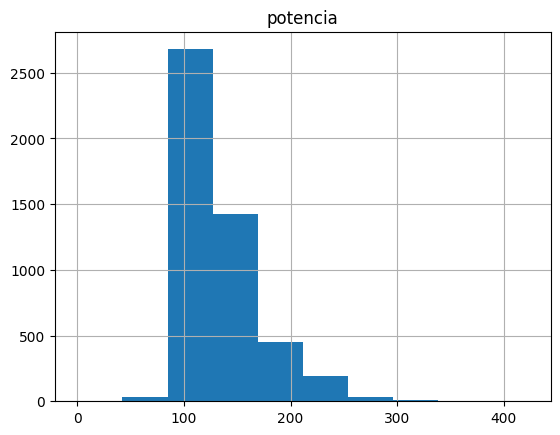

In [3017]:
imdb2.hist("potencia")

#Tratamiento outliers

##km

/usr/local/lib/python3.10/dist-packages/IPython/core/displayhook.py:275: UserWarning: Output cache limit (currently 1000 entries) hit.
Flushing oldest 200 entries.
  warn('Output cache limit (currently {sz} entries) hit.\n'


array([[<Axes: title={'center': 'km'}>]], dtype=object)

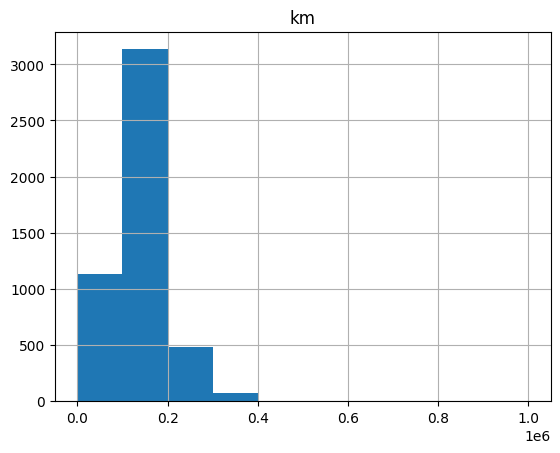

In [3018]:
imdb2.hist("km")

<Axes: xlabel='km'>

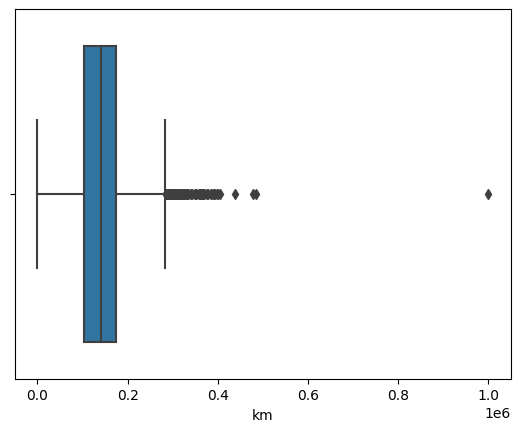

In [3019]:
sns.boxplot(x=imdb2["km"])

In [3020]:
imdb2[imdb2["km"]>=0.4e6]

,modelo,km,potencia,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,fecha_venta
545,520,484615.0,120.0,diesel,blue,estate,True,True,False,False,sin_bluetooth,True,False,8300.0,2018-03-01
1559,320,400654.0,110.0,diesel,black,estate,False,False,True,False,False,True,False,1800.0,2018-07-01
2336,318,477571.0,85.0,diesel,grey,sin_tipo,False,True,False,False,True,False,False,1200.0,2018-07-01
2815,525,439060.0,105.0,diesel,silver,sin_tipo,False,False,True,False,False,True,False,100.0,2018-03-01
3184,320,405816.0,100.0,diesel,blue,sedan,False,False,False,False,sin_bluetooth,True,False,500.0,2018-05-01
3718,118,1000376.0,90.0,diesel,sin_color,sin_tipo,True,False,False,False,sin_bluetooth,True,False,1400.0,2018-06-01


In [3021]:
imdb2[imdb2["km"]<=0]

,modelo,km,potencia,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,fecha_venta
2924,640 Gran Coupé,-64.0,230.0,diesel,black,sedan,True,True,False,False,False,True,True,75000.0,2018-04-01


In [3022]:
#Elimino valores outlier de km, mayor a 0.4e6 y menores de 0

In [3023]:
imdb2 = imdb2.drop(imdb2[imdb2['km'] <= 0].index)

In [3024]:
imdb2 = imdb2.drop(imdb2[imdb2['km'] >=0.4e6].index)

In [3025]:
imdb2[imdb2["km"]>=0.4e6] & imdb2[imdb2["km"]<=0]

,modelo,km,potencia,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,fecha_venta


array([[<Axes: title={'center': 'km'}>]], dtype=object)

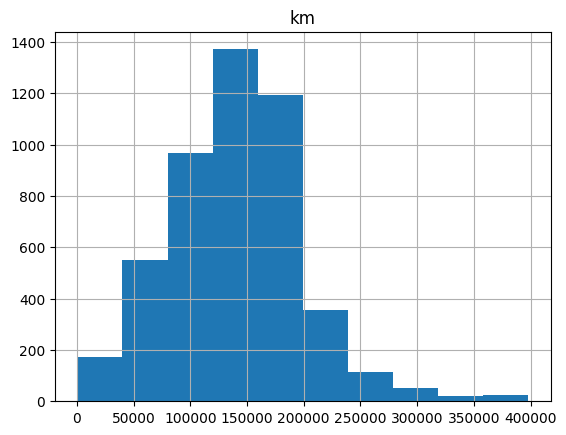

In [3026]:
imdb2.hist('km')

<Axes: xlabel='km'>

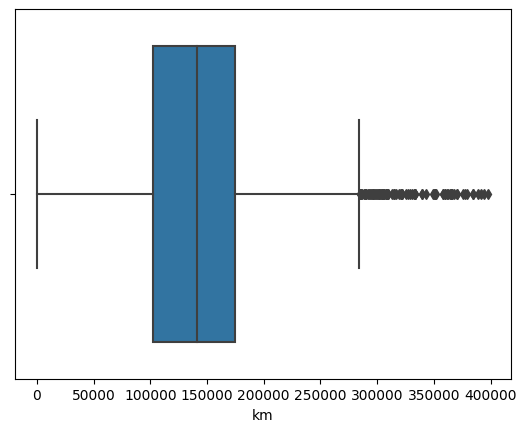

In [3027]:
sns.boxplot(x=imdb2["km"])

##potencia

array([[<Axes: title={'center': 'potencia'}>]], dtype=object)

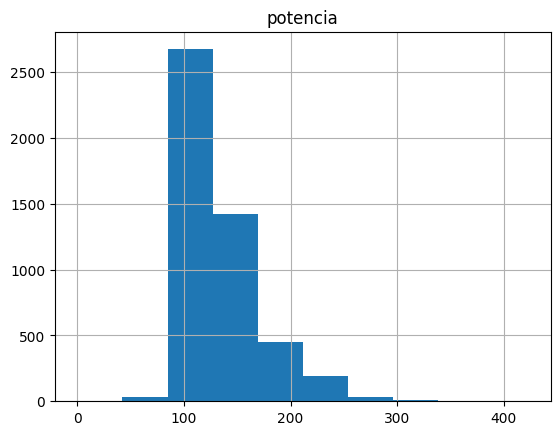

In [3028]:
imdb2.hist("potencia")

<Axes: xlabel='potencia'>

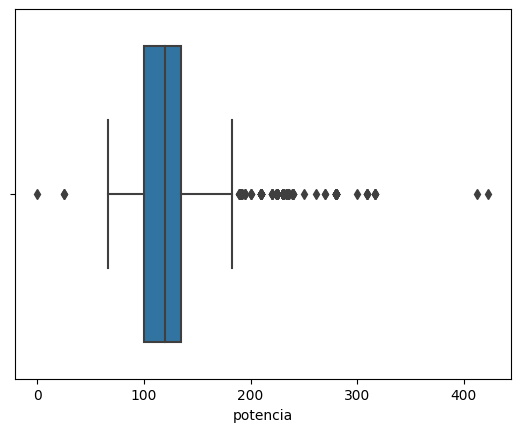

In [3029]:
sns.boxplot(x=imdb2["potencia"])

In [3030]:
#Evaluo mayores y menores

In [3031]:
imdb2[imdb2["potencia"]<=0]

,modelo,km,potencia,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,fecha_venta
3751,X1,81770.0,0.0,diesel,white,suv,False,False,False,False,False,False,sin_alerta,11700.0,2018-03-01


In [3032]:
imdb2[imdb2["potencia"]>400]

,modelo,km,potencia,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,fecha_venta
3587,M5,150187.0,412.0,petrol,white,sedan,True,True,True,True,True,True,True,41600.0,2018-09-01
4132,X6 M,2970.0,423.0,petrol,red,suv,True,sin_aire,True,False,False,True,True,82400.0,2018-04-01


In [3033]:
#elimino potencias menor de 0

In [3034]:
imdb2 = imdb2.drop(imdb2[imdb2['potencia'] <=0].index)

In [3035]:
imdb2[imdb2["potencia"]<=0]

,modelo,km,potencia,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,fecha_venta


array([[<Axes: title={'center': 'potencia'}>]], dtype=object)

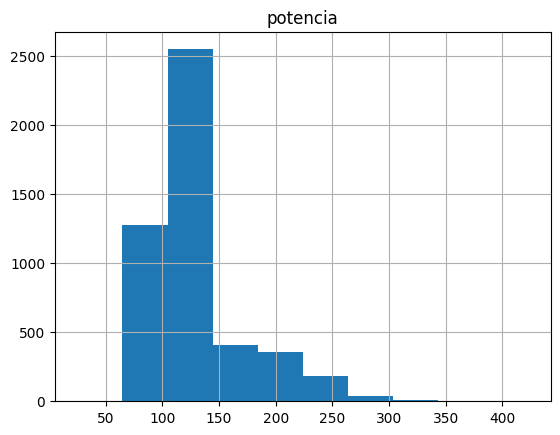

In [3036]:
imdb2.hist("potencia")

<Axes: xlabel='potencia'>

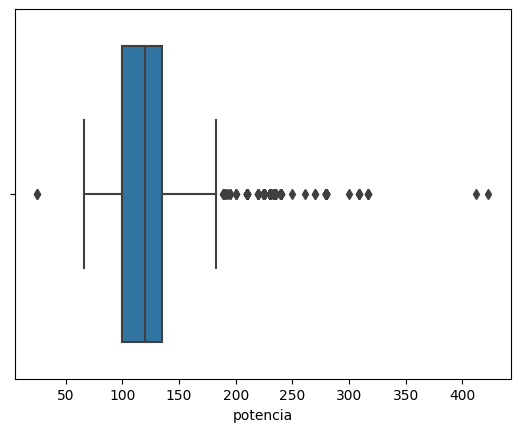

In [3037]:
sns.boxplot(x=imdb2["potencia"])

##precio

array([[<Axes: title={'center': 'precio'}>]], dtype=object)

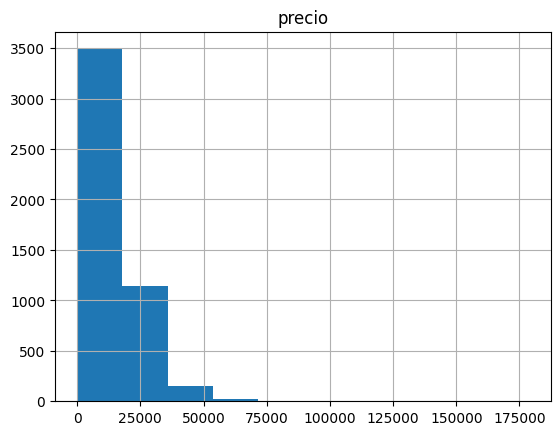

In [3038]:
imdb2.hist("precio")

<Axes: xlabel='precio'>

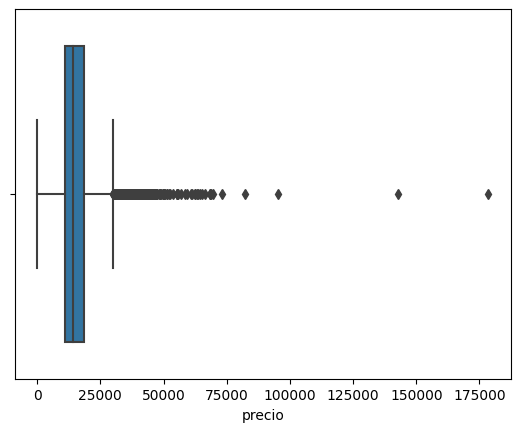

In [3039]:
sns.boxplot(x=imdb2["precio"])

In [3040]:
imdb2[imdb2["precio"]>=70000]

,modelo,km,potencia,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,fecha_venta
88,i8,12402.0,170.0,hybrid_petrol,grey,coupe,True,True,False,False,False,False,True,95200.0,2018-04-01
4132,X6 M,2970.0,423.0,petrol,red,suv,True,sin_aire,True,False,False,True,True,82400.0,2018-04-01
4670,X4,103222.0,140.0,diesel,grey,suv,True,True,False,True,False,True,True,142800.0,2018-08-01
4717,X5 M,4530.0,230.0,diesel,silver,suv,True,sin_aire,False,False,False,False,True,73100.0,2018-08-01
4739,X3,72515.0,135.0,diesel,blue,suv,False,False,True,False,sin_bluetooth,False,True,178500.0,2018-08-01


In [3041]:
imdb2[imdb2["precio"]<1000]

,modelo,km,potencia,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,fecha_venta
163,320,209208.0,135.0,diesel,black,estate,False,sin_aire,False,False,False,False,True,800.0,2018-04-01
168,320,146639.0,135.0,diesel,silver,estate,False,True,False,False,False,True,True,800.0,2018-04-01
169,316,159983.0,85.0,diesel,grey,estate,False,False,False,False,False,False,True,800.0,2018-04-01
182,320,101013.0,120.0,diesel,blue,estate,False,True,False,False,False,True,True,800.0,2018-05-01
183,316,130019.0,85.0,diesel,white,estate,False,False,False,False,False,False,sin_alerta,800.0,2018-03-01
192,320,165516.0,135.0,diesel,blue,estate,False,False,False,False,sin_bluetooth,True,False,800.0,2018-05-01
197,318,170164.0,105.0,diesel,grey,sin_tipo,False,True,False,False,sin_bluetooth,True,True,800.0,2018-05-01
208,330,127461.0,190.0,diesel,silver,estate,False,True,False,False,False,True,True,800.0,2018-05-01
217,318,147097.0,105.0,diesel,sin_color,estate,False,False,False,False,False,False,True,800.0,2018-03-01
240,320,150969.0,135.0,diesel,blue,estate,False,False,False,False,False,True,False,800.0,2018-01-01


In [3042]:
#aplico media a valores abajo de 1000

In [3043]:
imdb2= imdb2.drop(imdb2[imdb2['precio'] < 1000].index)

array([[<Axes: title={'center': 'precio'}>]], dtype=object)

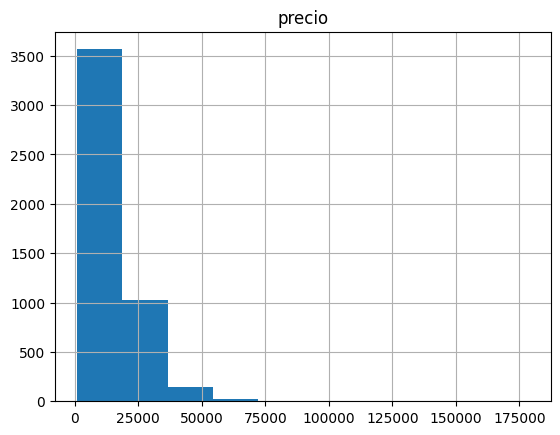

In [3044]:
imdb2.hist("precio")

#Analisis correlacion inicial

In [3045]:
corr = imdb2.corr(numeric_only = True)

In [3046]:
corr.style.background_gradient(cmap='coolwarm')

,km,potencia,gps,precio
km,1.000000,-0.036216,0.167462,-0.407137
potencia,-0.036216,1.000000,0.001308,0.642485
gps,0.167462,0.001308,1.000000,-0.031350
precio,-0.407137,0.642485,-0.031350,1.000000


In [3047]:
#el mas correlacionado hasta el momento es potencio con 0.64

#Copia

In [3048]:
imdb3 = imdb2.copy()

# Analisis de ariables vs target

array([[<Axes: title={'center': 'precio'}>]], dtype=object)

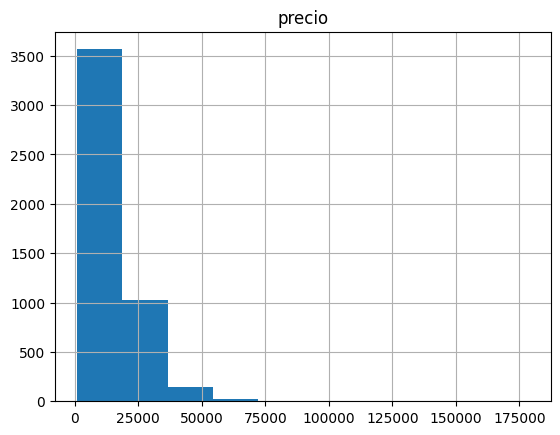

In [3049]:
imdb3.hist("precio")

In [3050]:
# podemos ve que la media esta entre los 15000, en el histograma y en el boxplot

<Axes: xlabel='precio'>

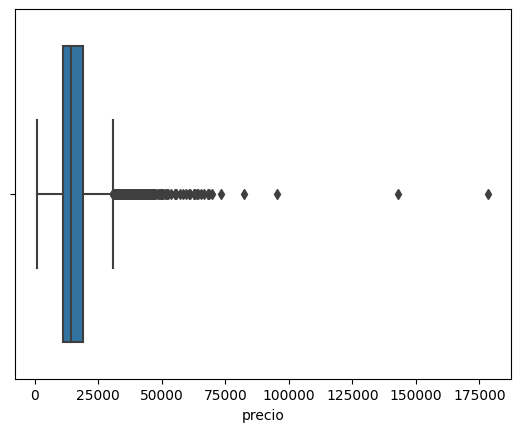

In [3051]:
sns.boxplot(x=imdb3["precio"])

In [3052]:
#aplico loga 10 como es recomendado, y lo llevamos a una campana de gaus

In [3053]:
imdb3["log_precio"]=np.log10(imdb3["precio"])

array([[<Axes: title={'center': 'log_precio'}>]], dtype=object)

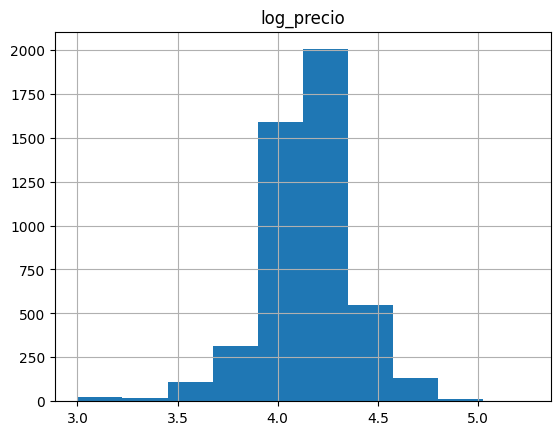

In [3054]:
imdb3.hist("log_precio")

<Axes: xlabel='log_precio'>

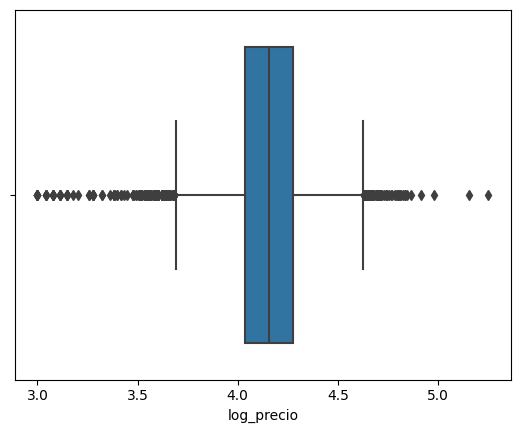

In [3055]:
sns.boxplot(x=imdb3["log_precio"])

In [3056]:
imdb3.head()

,modelo,km,potencia,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,fecha_venta,log_precio
0,118,140411.0,100.0,diesel,black,sin_tipo,True,True,False,True,sin_bluetooth,True,sin_alerta,11300.0,2018-01-01,4.053078
1,M4,13929.0,317.0,petrol,grey,convertible,True,True,False,False,True,True,True,69700.0,2018-02-01,4.843233
2,320,183297.0,120.0,diesel,white,sin_tipo,False,False,False,True,False,True,False,10200.0,2018-02-01,4.008600
3,420,128035.0,135.0,diesel,red,convertible,True,True,False,True,True,True,sin_alerta,25100.0,2018-02-01,4.399674
4,425,97097.0,160.0,diesel,silver,sin_tipo,True,True,False,False,True,True,True,33400.0,2018-04-01,4.523746


<Axes: xlabel='modelo', ylabel='precio'>

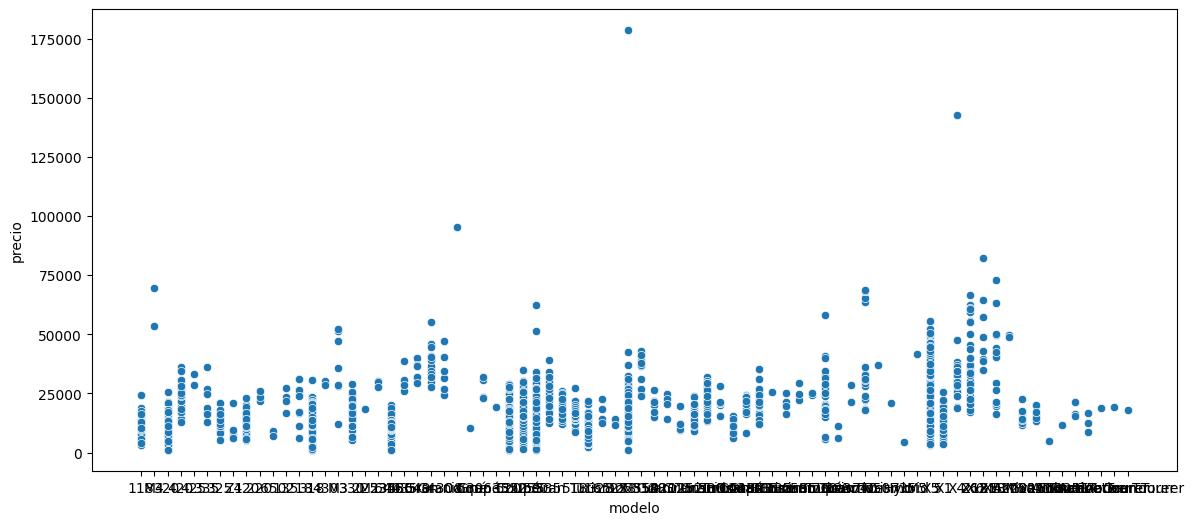

In [3057]:
#precio Modelo --> si hay relacion entre precio y modelo.
plt.figure(figsize=(14,6))
sns.scatterplot(x="modelo", y="precio",data=imdb3)

<Axes: xlabel='km', ylabel='precio'>

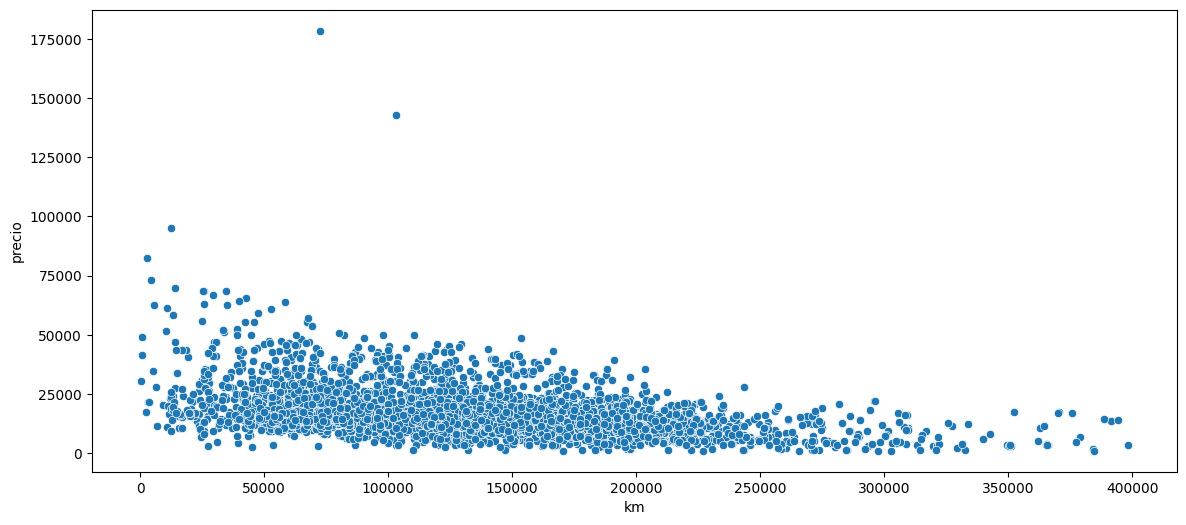

In [3058]:
#precio km --> podemos ver que si influye en el precio de una manera media
plt.figure(figsize=(14,6))
sns.scatterplot(x="km", y="precio",data=imdb3)

<Axes: xlabel='potencia', ylabel='precio'>

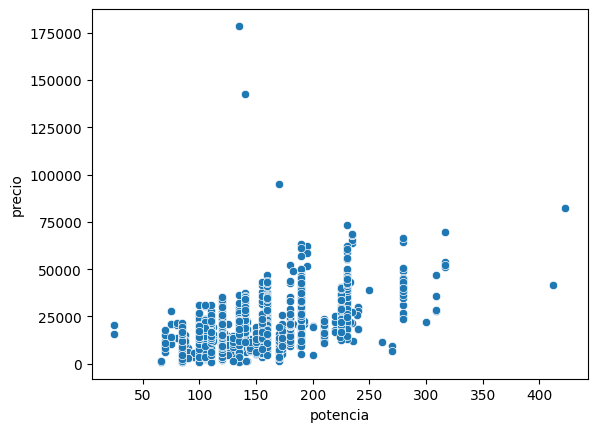

In [3059]:
#precio potencia --> entre mas potencia hay una relacion con el precio --> mas potencia, mas precio
sns.scatterplot(x="potencia", y="precio",data=imdb3)

<Axes: xlabel='tipo_gasolina', ylabel='precio'>

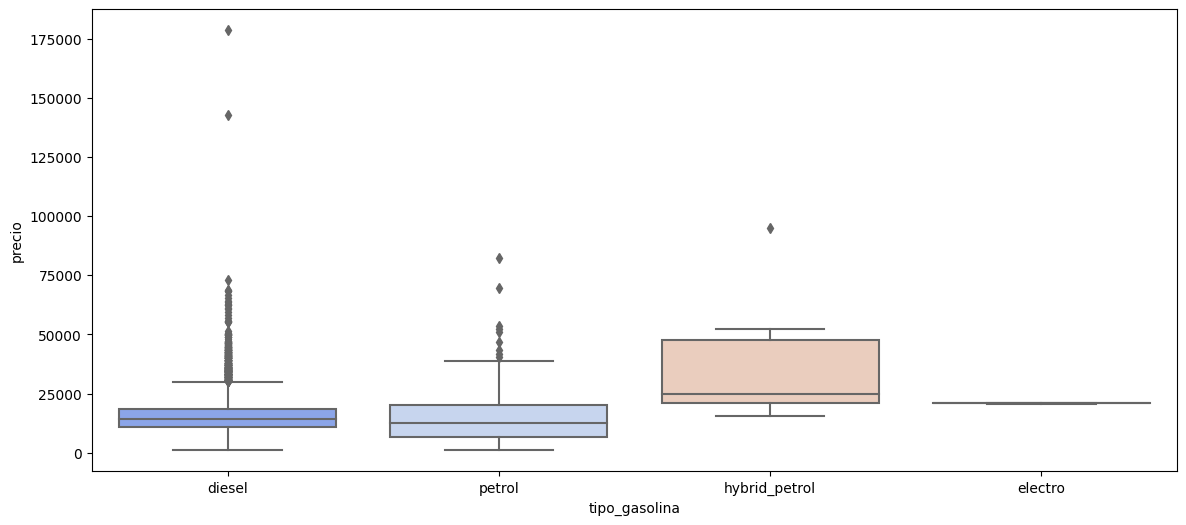

In [3060]:
#precio tipo gasolina --> afecta mas cuando son hibridos y electricos.
plt.figure(figsize=(14,6))
sns.boxplot(x="tipo_gasolina",y="precio",  data=imdb3, palette="coolwarm")

In [3061]:
#precio color --> puede modificar ligeramente el precio

<Axes: xlabel='color', ylabel='precio'>

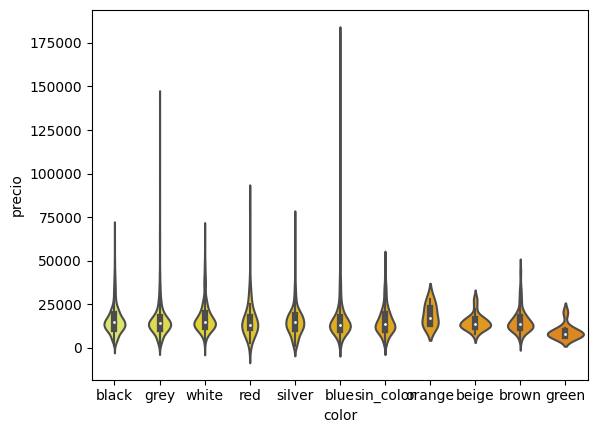

In [3062]:
sns.violinplot(x="color",y="precio", data=imdb3, palette="Wistia")

<Axes: xlabel='tipo_coche', ylabel='precio'>

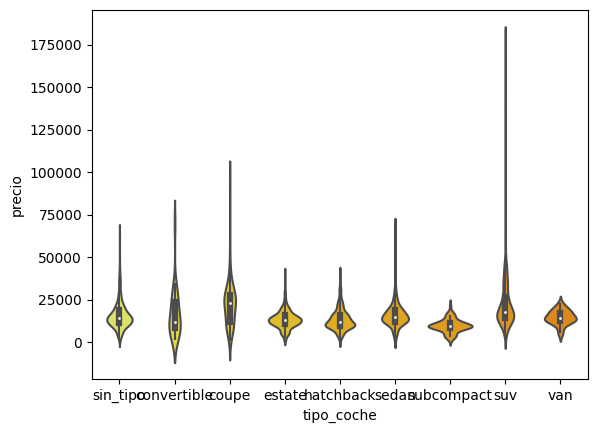

In [3063]:
#precio tipo_coche --> cierta relacion, pero solo en ciertos tipos de coche.
#el tipo de coche puede modificar ligeramente el precio
sns.violinplot(x="tipo_coche",y="precio", data=imdb3, palette="Wistia")


<Axes: xlabel='aire_acondicionado', ylabel='precio'>

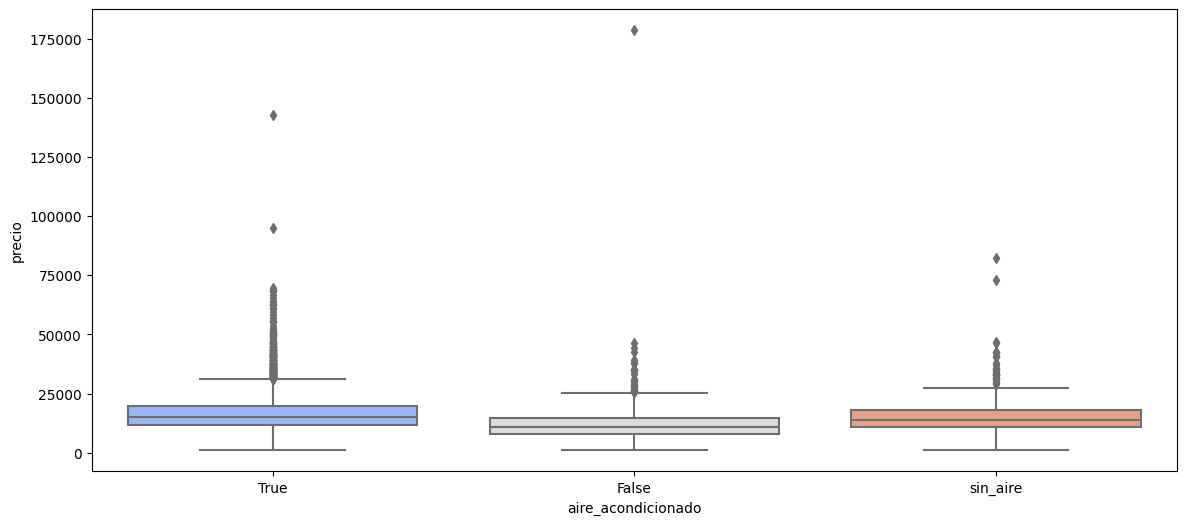

In [3064]:
#precio aire_acondicionado. --> poca relacion enre columnas
plt.figure(figsize=(14,6))
sns.boxplot(x="aire_acondicionado",y="precio",  data=imdb3, palette="coolwarm")

<Axes: xlabel='bluetooth', ylabel='precio'>

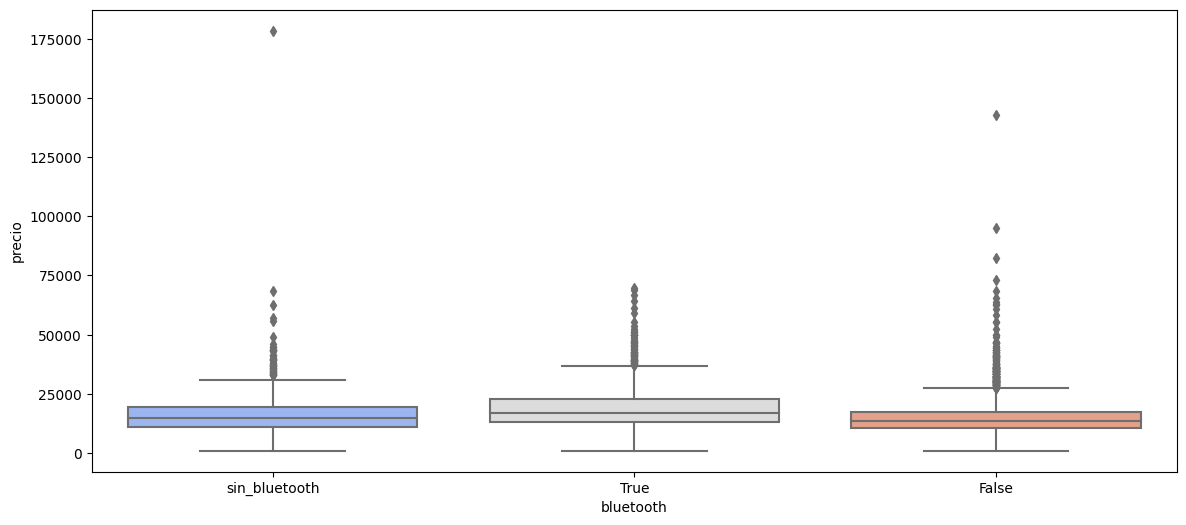

In [3065]:
# precio bluethoot --> poca relacion entre las columnas
plt.figure(figsize=(14,6))
sns.boxplot(x="bluetooth",y="precio",  data=imdb3, palette="coolwarm")

#transformacion de variables

In [3066]:
imdb3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4758 entries, 0 to 4825
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   modelo                4758 non-null   object 
 1   km                    4758 non-null   float64
 2   potencia              4758 non-null   float64
 3   tipo_gasolina         4758 non-null   object 
 4   color                 4758 non-null   object 
 5   tipo_coche            4758 non-null   object 
 6   volante_regulable     4758 non-null   object 
 7   aire_acondicionado    4758 non-null   object 
 8   camara_trasera        4758 non-null   object 
 9   elevalunas_electrico  4758 non-null   object 
 10  bluetooth             4758 non-null   object 
 11  gps                   4758 non-null   bool   
 12  alerta_lim_velocidad  4758 non-null   object 
 13  precio                4758 non-null   float64
 14  fecha_venta           4758 non-null   object 
 15  log_precio           

#Aquellas que tienen true y false


1.   Reviso Value_counts

1.   convierto en entero con astype(int)
2.   elimino antigua columna antigua

2.   reset index

1.   Corroboro Value_counts







#gps

In [3067]:
imdb3['gps'].value_counts()

True     4453
False     305
Name: gps, dtype: int64

In [3068]:
imdb3["gps_int"]= imdb3["gps"].astype(int)

In [3069]:
del(imdb3["gps"])

In [3070]:
imdb3.reset_index(drop=True, inplace=True)

In [3071]:
imdb3['gps_int'].value_counts()

1    4453
0     305
Name: gps_int, dtype: int64

#volante_regulable

In [3072]:
# convierto en entero con astype(int)

In [3073]:
imdb3["volante_regulable"].value_counts()

True     2646
False    2112
Name: volante_regulable, dtype: int64

In [3074]:
imdb3["volante_regulable_int"]= imdb3["volante_regulable"].astype(int)

In [3075]:
del(imdb3["volante_regulable"])

In [3076]:
imdb3.reset_index(drop=True, inplace=True)

In [3077]:
imdb3["volante_regulable_int"].value_counts()

1    2646
0    2112
Name: volante_regulable_int, dtype: int64

#camara_trasera

In [3078]:
# convierto en entero con astype(int)

In [3079]:
imdb3["camara_trasera"].value_counts()

False    3790
True      968
Name: camara_trasera, dtype: int64

In [3080]:
imdb3["camara_trasera_int"]= imdb3["camara_trasera"].astype(int)

In [3081]:
del(imdb3["camara_trasera"])

In [3082]:
imdb3.reset_index(drop=True, inplace=True)

In [3083]:
imdb3["camara_trasera_int"].value_counts()

0    3790
1     968
Name: camara_trasera_int, dtype: int64

#elevalunas_electrico

In [3084]:
imdb3["elevalunas_electrico"].value_counts()

False    2539
True     2219
Name: elevalunas_electrico, dtype: int64

In [3085]:
# convierto en entero con astype(int)

In [3086]:
imdb3["elevalunas_electrico_int"]= imdb3["elevalunas_electrico"].astype(int)

In [3087]:
del(imdb3["elevalunas_electrico"])

In [3088]:
imdb3.reset_index(drop=True, inplace=True)

In [3089]:
imdb3["elevalunas_electrico_int"].value_counts()

0    2539
1    2219
Name: elevalunas_electrico_int, dtype: int64

# separacion de variables

In [3090]:
#separamos variables en categoricas, numericas y boolenas y las visualizo para ver que columnas tengo en cada lista

In [3091]:
target= ["precio"]
def obtener_lista_variables(dataset):
    lista_numericas=[]
    lista_boolean=[]
    lista_categoricas=[]
    for i in dataset:
        if    (dataset[i].dtype.kind=="f" or dataset[i].dtype.kind=="i") and len(dataset[i].unique())!= 2  and i not in target:
              lista_numericas.append(i)
        elif  (dataset[i].dtype.kind=="f" or dataset[i].dtype.kind=="i")  and len(dataset[i].unique())== 2  and i not in target:
              lista_boolean.append(i)
        elif  (dataset[i].dtype.kind=="O")  and i not in target:
              lista_categoricas.append(i)

    return lista_numericas, lista_boolean, lista_categoricas

In [3092]:
lista_numericas, lista_boolean, lista_categoricas= obtener_lista_variables(imdb3)

In [3093]:
lista_numericas

['km', 'potencia', 'log_precio']

In [3094]:
lista_boolean

['gps_int',
 'volante_regulable_int',
 'camara_trasera_int',
 'elevalunas_electrico_int']

In [3095]:
lista_categoricas

['modelo',
 'tipo_gasolina',
 'color',
 'tipo_coche',
 'aire_acondicionado',
 'bluetooth',
 'alerta_lim_velocidad',
 'fecha_venta']

In [3096]:
#Marcamos cuales son nuestros targets

In [3097]:
target=["precio","log_precio"]

##fecha_venta

In [3098]:
# Convierto con datetime y separo por columnas, año, mes y año

In [3099]:
imdb3["fecha_venta"] = pd.to_datetime(imdb3["fecha_venta"])

In [3100]:
for col in ['fecha_venta']:
    imdb3[col + '_nombredia'] = imdb3[col].dt.day_name()
    ##O .dt.weekday_name
    imdb3[col + '_dia'] = imdb3[col].dt.day
    imdb3[col + '_mes'] = imdb3[col].dt.month
    imdb3[col + '_año'] = imdb3[col].dt.year

    del imdb3[col]

In [3101]:
imdb3.value_counts("fecha_venta_año")

fecha_venta_año
2018    4754
2007       1
2008       1
2009       1
2010       1
dtype: int64

In [3102]:
imdb3.value_counts("fecha_venta_mes")

fecha_venta_mes
5    801
3    718
4    683
6    596
7    529
8    521
2    489
9    221
1    200
dtype: int64

In [3103]:
#Observo que todos los días del registro son en fecha 1

In [3104]:
imdb3.value_counts("fecha_venta_dia")

fecha_venta_dia
1    4758
dtype: int64

In [3105]:
imdb3.value_counts("fecha_venta_nombredia")

fecha_venta_nombredia
Sunday       1211
Thursday     1208
Tuesday       801
Friday        595
Wednesday     522
Saturday      221
Monday        200
dtype: int64

In [3106]:
#Elimino fecha nombre día, no aporta valor

In [3107]:
del(imdb3["fecha_venta_dia"])

In [3108]:
imdb3.dtypes

modelo                       object
km                          float64
potencia                    float64
tipo_gasolina                object
color                        object
tipo_coche                   object
aire_acondicionado           object
bluetooth                    object
alerta_lim_velocidad         object
precio                      float64
log_precio                  float64
gps_int                       int64
volante_regulable_int         int64
camara_trasera_int            int64
elevalunas_electrico_int      int64
fecha_venta_nombredia        object
fecha_venta_mes               int64
fecha_venta_año               int64
dtype: object

##copia

In [3109]:
imdb4 =imdb3.copy()

# OrdinalEncoder = aquellas que tengan 3 variables

 iniio reviso informacion con .info y .head y extraigo mis listas


---



 procedimiento para aire_acondicionado, bluetooth, alerta_lim_velocidad es:


1.   reviso value_counts

1.   convierto a string,  con astype(str) creando nueva columna con complemento _str.

1.   elimino antigua columna

1.   Reset index

1.   reviso que el value counts este bien.
2.   reviso Head

2.   ordinal encoder, marcando 3 valores True, False, sin_...(depende de que columna sea).

2.   reviso OE

2.   Realizo fi.transform

1.   elimino antigua columna de string
2.  Reset index

2.   Remuevo de lista categorica
2.   reviso Head

In [3110]:
imdb4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4758 entries, 0 to 4757
Data columns (total 18 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   modelo                    4758 non-null   object 
 1   km                        4758 non-null   float64
 2   potencia                  4758 non-null   float64
 3   tipo_gasolina             4758 non-null   object 
 4   color                     4758 non-null   object 
 5   tipo_coche                4758 non-null   object 
 6   aire_acondicionado        4758 non-null   object 
 7   bluetooth                 4758 non-null   object 
 8   alerta_lim_velocidad      4758 non-null   object 
 9   precio                    4758 non-null   float64
 10  log_precio                4758 non-null   float64
 11  gps_int                   4758 non-null   int64  
 12  volante_regulable_int     4758 non-null   int64  
 13  camara_trasera_int        4758 non-null   int64  
 14  elevalun

In [3111]:
imdb4.head()

,modelo,km,potencia,tipo_gasolina,color,tipo_coche,aire_acondicionado,bluetooth,alerta_lim_velocidad,precio,log_precio,gps_int,volante_regulable_int,camara_trasera_int,elevalunas_electrico_int,fecha_venta_nombredia,fecha_venta_mes,fecha_venta_año
0,118,140411.0,100.0,diesel,black,sin_tipo,True,sin_bluetooth,sin_alerta,11300.0,4.053078,1,1,0,1,Monday,1,2018
1,M4,13929.0,317.0,petrol,grey,convertible,True,True,True,69700.0,4.843233,1,1,0,0,Thursday,2,2018
2,320,183297.0,120.0,diesel,white,sin_tipo,False,False,False,10200.0,4.008600,1,0,0,1,Thursday,2,2018
3,420,128035.0,135.0,diesel,red,convertible,True,True,sin_alerta,25100.0,4.399674,1,1,0,1,Thursday,2,2018
4,425,97097.0,160.0,diesel,silver,sin_tipo,True,True,True,33400.0,4.523746,1,1,0,0,Sunday,4,2018


In [3112]:
target=["precio","log_precio"]

In [3113]:
lista_numericas2, lista_boolean2, lista_categoricas2= obtener_lista_variables(imdb4)

In [3114]:
lista_numericas2

['km', 'potencia', 'fecha_venta_mes', 'fecha_venta_año']

In [3115]:
lista_boolean2

['gps_int',
 'volante_regulable_int',
 'camara_trasera_int',
 'elevalunas_electrico_int']

In [3116]:
lista_categoricas2

['modelo',
 'tipo_gasolina',
 'color',
 'tipo_coche',
 'aire_acondicionado',
 'bluetooth',
 'alerta_lim_velocidad',
 'fecha_venta_nombredia']

##aire_acondicionado

In [3117]:
imdb4["aire_acondicionado"].value_counts()

True        3436
False        847
sin_aire     475
Name: aire_acondicionado, dtype: int64

In [3118]:
imdb4["aire_acondicionado_str"]= imdb4["aire_acondicionado"].astype(str)

In [3119]:
del(imdb4["aire_acondicionado"])

In [3120]:
imdb4.reset_index(drop=True, inplace=True)

In [3121]:
imdb4["aire_acondicionado_str"].value_counts()

True        3436
False        847
sin_aire     475
Name: aire_acondicionado_str, dtype: int64

In [3122]:
imdb4.head()

,modelo,km,potencia,tipo_gasolina,color,tipo_coche,bluetooth,alerta_lim_velocidad,precio,log_precio,gps_int,volante_regulable_int,camara_trasera_int,elevalunas_electrico_int,fecha_venta_nombredia,fecha_venta_mes,fecha_venta_año,aire_acondicionado_str
0,118,140411.0,100.0,diesel,black,sin_tipo,sin_bluetooth,sin_alerta,11300.0,4.053078,1,1,0,1,Monday,1,2018,True
1,M4,13929.0,317.0,petrol,grey,convertible,True,True,69700.0,4.843233,1,1,0,0,Thursday,2,2018,True
2,320,183297.0,120.0,diesel,white,sin_tipo,False,False,10200.0,4.008600,1,0,0,1,Thursday,2,2018,False
3,420,128035.0,135.0,diesel,red,convertible,True,sin_alerta,25100.0,4.399674,1,1,0,1,Thursday,2,2018,True
4,425,97097.0,160.0,diesel,silver,sin_tipo,True,True,33400.0,4.523746,1,1,0,0,Sunday,4,2018,True


In [3123]:
oe = OrdinalEncoder(categories=[['True','False','sin_aire']])

In [3124]:
oe

OrdinalEncoder(categories=[['True', 'False', 'sin_aire']])

In [3125]:
imdb4["aire_acondicionado_oe"]=oe.fit_transform(imdb4[['aire_acondicionado_str']])

In [3126]:
del(imdb4["aire_acondicionado_str"])

In [3127]:
imdb4.reset_index(drop=True, inplace=True)

In [3128]:
lista_categoricas2.remove("aire_acondicionado")

In [3129]:
imdb4.head()

,modelo,km,potencia,tipo_gasolina,color,tipo_coche,bluetooth,alerta_lim_velocidad,precio,log_precio,gps_int,volante_regulable_int,camara_trasera_int,elevalunas_electrico_int,fecha_venta_nombredia,fecha_venta_mes,fecha_venta_año,aire_acondicionado_oe
0,118,140411.0,100.0,diesel,black,sin_tipo,sin_bluetooth,sin_alerta,11300.0,4.053078,1,1,0,1,Monday,1,2018,0.0
1,M4,13929.0,317.0,petrol,grey,convertible,True,True,69700.0,4.843233,1,1,0,0,Thursday,2,2018,0.0
2,320,183297.0,120.0,diesel,white,sin_tipo,False,False,10200.0,4.008600,1,0,0,1,Thursday,2,2018,1.0
3,420,128035.0,135.0,diesel,red,convertible,True,sin_alerta,25100.0,4.399674,1,1,0,1,Thursday,2,2018,0.0
4,425,97097.0,160.0,diesel,silver,sin_tipo,True,True,33400.0,4.523746,1,1,0,0,Sunday,4,2018,0.0


##Bluetooth

In [3130]:
imdb4["bluetooth"].value_counts()

False            3052
True              990
sin_bluetooth     716
Name: bluetooth, dtype: int64

In [3131]:
imdb4["bluetooth_str"]= imdb4["bluetooth"].astype(str)

In [3132]:
del(imdb4["bluetooth"])

In [3133]:
imdb4.reset_index(drop=True, inplace=True)

In [3134]:
imdb4["bluetooth_str"].value_counts()

False            3052
True              990
sin_bluetooth     716
Name: bluetooth_str, dtype: int64

In [3135]:
imdb4.head()

,modelo,km,potencia,tipo_gasolina,color,tipo_coche,alerta_lim_velocidad,precio,log_precio,gps_int,volante_regulable_int,camara_trasera_int,elevalunas_electrico_int,fecha_venta_nombredia,fecha_venta_mes,fecha_venta_año,aire_acondicionado_oe,bluetooth_str
0,118,140411.0,100.0,diesel,black,sin_tipo,sin_alerta,11300.0,4.053078,1,1,0,1,Monday,1,2018,0.0,sin_bluetooth
1,M4,13929.0,317.0,petrol,grey,convertible,True,69700.0,4.843233,1,1,0,0,Thursday,2,2018,0.0,True
2,320,183297.0,120.0,diesel,white,sin_tipo,False,10200.0,4.008600,1,0,0,1,Thursday,2,2018,1.0,False
3,420,128035.0,135.0,diesel,red,convertible,sin_alerta,25100.0,4.399674,1,1,0,1,Thursday,2,2018,0.0,True
4,425,97097.0,160.0,diesel,silver,sin_tipo,True,33400.0,4.523746,1,1,0,0,Sunday,4,2018,0.0,True


In [3136]:
oe = OrdinalEncoder(categories=[['True','False','sin_bluetooth']])

In [3137]:
oe

OrdinalEncoder(categories=[['True', 'False', 'sin_bluetooth']])

In [3138]:
imdb4["bluetooth_oe"]=oe.fit_transform(imdb4[['bluetooth_str']])

In [3139]:
del(imdb4["bluetooth_str"])

In [3140]:
imdb4.reset_index(drop=True, inplace=True)

In [3141]:
imdb4.head()

,modelo,km,potencia,tipo_gasolina,color,tipo_coche,alerta_lim_velocidad,precio,log_precio,gps_int,volante_regulable_int,camara_trasera_int,elevalunas_electrico_int,fecha_venta_nombredia,fecha_venta_mes,fecha_venta_año,aire_acondicionado_oe,bluetooth_oe
0,118,140411.0,100.0,diesel,black,sin_tipo,sin_alerta,11300.0,4.053078,1,1,0,1,Monday,1,2018,0.0,2.0
1,M4,13929.0,317.0,petrol,grey,convertible,True,69700.0,4.843233,1,1,0,0,Thursday,2,2018,0.0,0.0
2,320,183297.0,120.0,diesel,white,sin_tipo,False,10200.0,4.008600,1,0,0,1,Thursday,2,2018,1.0,1.0
3,420,128035.0,135.0,diesel,red,convertible,sin_alerta,25100.0,4.399674,1,1,0,1,Thursday,2,2018,0.0,0.0
4,425,97097.0,160.0,diesel,silver,sin_tipo,True,33400.0,4.523746,1,1,0,0,Sunday,4,2018,0.0,0.0


In [3142]:
lista_categoricas2.remove("bluetooth")

##alerta_lim_velocidad

In [3143]:
imdb4["alerta_lim_velocidad"].value_counts()

True          2207
False         1833
sin_alerta     718
Name: alerta_lim_velocidad, dtype: int64

In [3144]:
imdb4["alerta_lim_velocidad_str"]= imdb4["alerta_lim_velocidad"].astype(str)

In [3145]:
del(imdb4["alerta_lim_velocidad"])

In [3146]:
imdb4.reset_index(drop=True, inplace=True)

In [3147]:
imdb4["alerta_lim_velocidad_str"].value_counts()

True          2207
False         1833
sin_alerta     718
Name: alerta_lim_velocidad_str, dtype: int64

In [3148]:
imdb4.head()

,modelo,km,potencia,tipo_gasolina,color,tipo_coche,precio,log_precio,gps_int,volante_regulable_int,camara_trasera_int,elevalunas_electrico_int,fecha_venta_nombredia,fecha_venta_mes,fecha_venta_año,aire_acondicionado_oe,bluetooth_oe,alerta_lim_velocidad_str
0,118,140411.0,100.0,diesel,black,sin_tipo,11300.0,4.053078,1,1,0,1,Monday,1,2018,0.0,2.0,sin_alerta
1,M4,13929.0,317.0,petrol,grey,convertible,69700.0,4.843233,1,1,0,0,Thursday,2,2018,0.0,0.0,True
2,320,183297.0,120.0,diesel,white,sin_tipo,10200.0,4.008600,1,0,0,1,Thursday,2,2018,1.0,1.0,False
3,420,128035.0,135.0,diesel,red,convertible,25100.0,4.399674,1,1,0,1,Thursday,2,2018,0.0,0.0,sin_alerta
4,425,97097.0,160.0,diesel,silver,sin_tipo,33400.0,4.523746,1,1,0,0,Sunday,4,2018,0.0,0.0,True


In [3149]:
oe = OrdinalEncoder(categories=[['True','False','sin_alerta']])

In [3150]:
oe

OrdinalEncoder(categories=[['True', 'False', 'sin_alerta']])

In [3151]:
imdb4["alerta_lim_velocidad_oe"]=oe.fit_transform(imdb4[['alerta_lim_velocidad_str']])

In [3152]:
del(imdb4["alerta_lim_velocidad_str"])

In [3153]:
imdb4.reset_index(drop=True, inplace=True)

In [3154]:
lista_categoricas2.remove("alerta_lim_velocidad")

In [3155]:
imdb4.head()

,modelo,km,potencia,tipo_gasolina,color,tipo_coche,precio,log_precio,gps_int,volante_regulable_int,camara_trasera_int,elevalunas_electrico_int,fecha_venta_nombredia,fecha_venta_mes,fecha_venta_año,aire_acondicionado_oe,bluetooth_oe,alerta_lim_velocidad_oe
0,118,140411.0,100.0,diesel,black,sin_tipo,11300.0,4.053078,1,1,0,1,Monday,1,2018,0.0,2.0,2.0
1,M4,13929.0,317.0,petrol,grey,convertible,69700.0,4.843233,1,1,0,0,Thursday,2,2018,0.0,0.0,0.0
2,320,183297.0,120.0,diesel,white,sin_tipo,10200.0,4.008600,1,0,0,1,Thursday,2,2018,1.0,1.0,1.0
3,420,128035.0,135.0,diesel,red,convertible,25100.0,4.399674,1,1,0,1,Thursday,2,2018,0.0,0.0,2.0
4,425,97097.0,160.0,diesel,silver,sin_tipo,33400.0,4.523746,1,1,0,0,Sunday,4,2018,0.0,0.0,0.0


# label Encoder = aquellas que tengan mas de 3 opciones


 revismos informacion, y lista categorica, genero copia, extraigo mis nuevas listas con la copia de dataset, empiezo a realizar LabelEncoder

---


1.   realizo el label Encoder
2.   Elimino columna antigua

1.   Reset index
2.   remuevo de la categoria




In [3156]:
imdb4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4758 entries, 0 to 4757
Data columns (total 18 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   modelo                    4758 non-null   object 
 1   km                        4758 non-null   float64
 2   potencia                  4758 non-null   float64
 3   tipo_gasolina             4758 non-null   object 
 4   color                     4758 non-null   object 
 5   tipo_coche                4758 non-null   object 
 6   precio                    4758 non-null   float64
 7   log_precio                4758 non-null   float64
 8   gps_int                   4758 non-null   int64  
 9   volante_regulable_int     4758 non-null   int64  
 10  camara_trasera_int        4758 non-null   int64  
 11  elevalunas_electrico_int  4758 non-null   int64  
 12  fecha_venta_nombredia     4758 non-null   object 
 13  fecha_venta_mes           4758 non-null   int64  
 14  fecha_ve

In [3157]:
lista_categoricas2

['modelo', 'tipo_gasolina', 'color', 'tipo_coche', 'fecha_venta_nombredia']

#copia

In [3158]:
imdb5 = imdb4.copy()
#extraccion de listas
lista_numericas3, lista_boolean3, lista_categoricas3 = obtener_lista_variables(imdb5)

##fecha_venta_nombredia

In [3159]:
le = LabelEncoder()
imdb5['fecha_venta_nombredia_le']= le.fit_transform(imdb5['fecha_venta_nombredia'])

In [3160]:
del(imdb5["fecha_venta_nombredia"])

In [3161]:
imdb5.reset_index(drop=True, inplace=True)

In [3162]:
lista_categoricas3.remove("fecha_venta_nombredia")

##Modelo

In [3163]:
le = LabelEncoder()
imdb5['modelo_le']= le.fit_transform(imdb5['modelo'])

In [3164]:
del(imdb5["modelo"])

In [3165]:
imdb5.reset_index(drop=True, inplace=True)

In [3166]:
lista_categoricas3.remove("modelo")

##tipo_gasolina

In [3167]:
le = LabelEncoder()
imdb5['tipo_gasolina_le']= le.fit_transform(imdb5['tipo_gasolina'])

In [3168]:
del(imdb5["tipo_gasolina"])

In [3169]:
imdb5.reset_index(drop=True, inplace=True)

In [3170]:
lista_categoricas3.remove("tipo_gasolina")

##color

In [3171]:
le = LabelEncoder()
imdb5['color_le']= le.fit_transform(imdb5['color'])

In [3172]:
del(imdb5["color"])

In [3173]:
imdb5.reset_index(drop=True, inplace=True)

In [3174]:
lista_categoricas3.remove("color")

##tipo_coche

In [3175]:
le = LabelEncoder()
imdb5['tipo_coche_le']= le.fit_transform(imdb5['tipo_coche'])

In [3176]:
del(imdb5["tipo_coche"])

In [3177]:
imdb5.reset_index(drop=True, inplace=True)

In [3178]:
lista_categoricas3.remove("tipo_coche")

In [3179]:
#reviso que lista este terminada

In [3180]:
lista_categoricas3

[]

In [3181]:
imdb5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4758 entries, 0 to 4757
Data columns (total 18 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   km                        4758 non-null   float64
 1   potencia                  4758 non-null   float64
 2   precio                    4758 non-null   float64
 3   log_precio                4758 non-null   float64
 4   gps_int                   4758 non-null   int64  
 5   volante_regulable_int     4758 non-null   int64  
 6   camara_trasera_int        4758 non-null   int64  
 7   elevalunas_electrico_int  4758 non-null   int64  
 8   fecha_venta_mes           4758 non-null   int64  
 9   fecha_venta_año           4758 non-null   int64  
 10  aire_acondicionado_oe     4758 non-null   float64
 11  bluetooth_oe              4758 non-null   float64
 12  alerta_lim_velocidad_oe   4758 non-null   float64
 13  fecha_venta_nombredia_le  4758 non-null   int64  
 14  modelo_l

In [3182]:
imdb5.describe().T

,count,mean,std,min,25%,50%,75%,max
km,4758.0,139882.550231,57600.921277,476.0,102180.750000,140531.500000,174956.750000,398043.000000
potencia,4758.0,129.234342,39.010495,25.0,100.000000,120.000000,135.000000,423.000000
precio,4758.0,16027.217318,9074.383312,1000.0,10925.000000,14300.000000,18800.000000,178500.000000
log_precio,4758.0,4.147356,0.231055,3.0,4.038418,4.155336,4.274158,5.251638
gps_int,4758.0,0.935897,0.244961,0.0,1.000000,1.000000,1.000000,1.000000
volante_regulable_int,4758.0,0.556116,0.496893,0.0,0.000000,1.000000,1.000000,1.000000
camara_trasera_int,4758.0,0.203447,0.402604,0.0,0.000000,0.000000,0.000000,1.000000
elevalunas_electrico_int,4758.0,0.466372,0.498920,0.0,0.000000,0.000000,1.000000,1.000000
fecha_venta_mes,4758.0,4.940101,2.154234,1.0,3.000000,5.000000,7.000000,9.000000
fecha_venta_año,4758.0,2017.992013,0.277264,2007.0,2018.000000,2018.000000,2018.000000,2018.000000


#analisis de correlacion final

In [3183]:
imdb5.head(5)

,km,potencia,precio,log_precio,gps_int,volante_regulable_int,camara_trasera_int,elevalunas_electrico_int,fecha_venta_mes,fecha_venta_año,aire_acondicionado_oe,bluetooth_oe,alerta_lim_velocidad_oe,fecha_venta_nombredia_le,modelo_le,tipo_gasolina_le,color_le,tipo_coche_le
0,140411.0,100.0,11300.0,4.053078,1,1,0,1,1,2018,0.0,2.0,2.0,1,3,0,1,5
1,13929.0,317.0,69700.0,4.843233,1,1,0,0,2,2018,0.0,0.0,0.0,4,62,3,5,0
2,183297.0,120.0,10200.0,4.008600,1,0,0,1,2,2018,1.0,1.0,1.0,4,22,0,10,5
3,128035.0,135.0,25100.0,4.399674,1,1,0,1,2,2018,0.0,0.0,2.0,4,32,0,7,0
4,97097.0,160.0,33400.0,4.523746,1,1,0,0,4,2018,0.0,0.0,0.0,3,34,0,8,5


In [3184]:
# realizo la correlacion

In [3185]:
corr = imdb5.corr(numeric_only = True)

In [3186]:
corr.style.background_gradient(cmap='coolwarm')

,km,potencia,precio,log_precio,gps_int,volante_regulable_int,camara_trasera_int,elevalunas_electrico_int,fecha_venta_mes,fecha_venta_año,aire_acondicionado_oe,bluetooth_oe,alerta_lim_velocidad_oe,fecha_venta_nombredia_le,modelo_le,tipo_gasolina_le,color_le,tipo_coche_le
km,1.000000,-0.036216,-0.407137,-0.457366,0.167462,0.078505,0.004765,0.063292,-0.006827,-0.034676,-0.013045,0.024116,0.008648,-0.008502,-0.012281,-0.060273,-0.036544,-0.107629
potencia,-0.036216,1.000000,0.642485,0.580722,0.001308,0.324129,0.312627,0.340623,-0.027897,-0.001537,-0.100953,-0.124500,-0.303607,0.039018,0.544109,0.134367,0.000537,0.118410
precio,-0.407137,0.642485,1.000000,0.872025,-0.031350,0.255280,0.251626,0.251142,0.008709,0.014883,-0.139448,-0.107720,-0.273063,0.041713,0.491848,-0.004505,0.016837,0.231316
log_precio,-0.457366,0.580722,0.872025,1.000000,-0.018306,0.237364,0.218841,0.326076,-0.016137,0.013495,-0.192558,-0.124584,-0.296441,0.034770,0.472889,-0.070753,0.011704,0.215665
gps_int,0.167462,0.001308,-0.031350,-0.018306,1.000000,0.235942,0.055529,0.196503,0.058850,-0.007539,-0.197570,-0.072796,0.060337,-0.027228,-0.061122,-0.047348,-0.097827,-0.089948
volante_regulable_int,0.078505,0.324129,0.255280,0.237364,0.235942,1.000000,0.251858,0.273023,0.078848,0.000202,-0.178583,-0.082063,-0.131185,0.013118,0.321296,-0.003312,-0.079270,0.029545
camara_trasera_int,0.004765,0.312627,0.251626,0.218841,0.055529,0.251858,1.000000,0.196281,0.018901,0.014559,-0.054317,-0.068549,-0.118425,0.029498,0.218959,0.012310,-0.016086,0.069407
elevalunas_electrico_int,0.063292,0.340623,0.251142,0.326076,0.196503,0.273023,0.196281,1.000000,-0.027594,-0.001942,-0.159154,-0.150711,-0.205446,0.036288,0.225649,0.010105,-0.029920,-0.042726
fecha_venta_mes,-0.006827,-0.027897,0.008709,-0.016137,0.058850,0.078848,0.018901,-0.027594,1.000000,-0.009952,0.016965,0.009755,0.029427,0.046177,0.064244,-0.018747,0.001802,0.077057
fecha_venta_año,-0.034676,-0.001537,0.014883,0.013495,-0.007539,0.000202,0.014559,-0.001942,-0.009952,1.000000,-0.006494,-0.002783,-0.018868,-0.022565,0.016637,0.005872,0.026280,0.035249


In [3187]:
#pongo valores de manera ascendente

In [3188]:
resultado_corr= imdb5.corr().unstack().sort_values(ascending = False)

In [3189]:
resultado_imdb5= resultado_corr.to_frame().reset_index()

In [3190]:
#Ordeno en niveles

In [3191]:
print(resultado_imdb5[(resultado_imdb5['level_0']!=resultado_imdb5['level_1'])].to_string())

                      level_0                   level_1         0
18                 log_precio                    precio  0.872025
19                     precio                log_precio  0.872025
20                   potencia                    precio  0.642485
21                     precio                  potencia  0.642485
22                   potencia                log_precio  0.580722
23                 log_precio                  potencia  0.580722
24                   potencia                 modelo_le  0.544109
25                  modelo_le                  potencia  0.544109
26                  modelo_le             tipo_coche_le  0.496344
27              tipo_coche_le                 modelo_le  0.496344
28                  modelo_le                    precio  0.491848
29                     precio                 modelo_le  0.491848
30                  modelo_le                log_precio  0.472889
31                 log_precio                 modelo_le  0.472889
32        

In [3192]:
imdb5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4758 entries, 0 to 4757
Data columns (total 18 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   km                        4758 non-null   float64
 1   potencia                  4758 non-null   float64
 2   precio                    4758 non-null   float64
 3   log_precio                4758 non-null   float64
 4   gps_int                   4758 non-null   int64  
 5   volante_regulable_int     4758 non-null   int64  
 6   camara_trasera_int        4758 non-null   int64  
 7   elevalunas_electrico_int  4758 non-null   int64  
 8   fecha_venta_mes           4758 non-null   int64  
 9   fecha_venta_año           4758 non-null   int64  
 10  aire_acondicionado_oe     4758 non-null   float64
 11  bluetooth_oe              4758 non-null   float64
 12  alerta_lim_velocidad_oe   4758 non-null   float64
 13  fecha_venta_nombredia_le  4758 non-null   int64  
 14  modelo_l

In [3193]:
imdb5.head()

,km,potencia,precio,log_precio,gps_int,volante_regulable_int,camara_trasera_int,elevalunas_electrico_int,fecha_venta_mes,fecha_venta_año,aire_acondicionado_oe,bluetooth_oe,alerta_lim_velocidad_oe,fecha_venta_nombredia_le,modelo_le,tipo_gasolina_le,color_le,tipo_coche_le
0,140411.0,100.0,11300.0,4.053078,1,1,0,1,1,2018,0.0,2.0,2.0,1,3,0,1,5
1,13929.0,317.0,69700.0,4.843233,1,1,0,0,2,2018,0.0,0.0,0.0,4,62,3,5,0
2,183297.0,120.0,10200.0,4.008600,1,0,0,1,2,2018,1.0,1.0,1.0,4,22,0,10,5
3,128035.0,135.0,25100.0,4.399674,1,1,0,1,2,2018,0.0,0.0,2.0,4,32,0,7,0
4,97097.0,160.0,33400.0,4.523746,1,1,0,0,4,2018,0.0,0.0,0.0,3,34,0,8,5


In [3194]:
#min max escaler para valores de categoria numerica

In [3195]:
minMaxResultado=MinMaxScaler()

In [3196]:
imdb5[lista_numericas3]=minMaxResultado.fit_transform(imdb5[lista_numericas3])

In [3197]:
imdb5.head()

,km,potencia,precio,log_precio,gps_int,volante_regulable_int,camara_trasera_int,elevalunas_electrico_int,fecha_venta_mes,fecha_venta_año,aire_acondicionado_oe,bluetooth_oe,alerta_lim_velocidad_oe,fecha_venta_nombredia_le,modelo_le,tipo_gasolina_le,color_le,tipo_coche_le
0,0.351978,0.188442,11300.0,4.053078,1,1,0,1,0.000,1.0,0.0,1.0,1.0,1,3,0,1,5
1,0.033838,0.733668,69700.0,4.843233,1,1,0,0,0.125,1.0,0.0,0.0,0.0,4,62,3,5,0
2,0.459850,0.238693,10200.0,4.008600,1,0,0,1,0.125,1.0,0.5,0.5,0.5,4,22,0,10,5
3,0.320849,0.276382,25100.0,4.399674,1,1,0,1,0.125,1.0,0.0,0.0,1.0,4,32,0,7,0
4,0.243031,0.339196,33400.0,4.523746,1,1,0,0,0.375,1.0,0.0,0.0,0.0,3,34,0,8,5


In [3198]:
imdb5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4758 entries, 0 to 4757
Data columns (total 18 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   km                        4758 non-null   float64
 1   potencia                  4758 non-null   float64
 2   precio                    4758 non-null   float64
 3   log_precio                4758 non-null   float64
 4   gps_int                   4758 non-null   int64  
 5   volante_regulable_int     4758 non-null   int64  
 6   camara_trasera_int        4758 non-null   int64  
 7   elevalunas_electrico_int  4758 non-null   int64  
 8   fecha_venta_mes           4758 non-null   float64
 9   fecha_venta_año           4758 non-null   float64
 10  aire_acondicionado_oe     4758 non-null   float64
 11  bluetooth_oe              4758 non-null   float64
 12  alerta_lim_velocidad_oe   4758 non-null   float64
 13  fecha_venta_nombredia_le  4758 non-null   int64  
 14  modelo_l

In [3199]:
#creo una copia final y un pickle

In [3200]:
entregable_final=imdb5.copy()

In [3201]:
pd.to_pickle(entregable_final,"/content/drive/MyDrive/Colab Notebooks/Entregable/entregable_final")